In [1]:
import numpy as np 
import matplotlib.pyplot as plt

nsol = 555
ncat = 1
nan = 1
catl = ["Li", "Na", "K", "Rb", "Cs"]
# catl = ["Li"]
anl = ["Cl"]

watermodel = 'TIP4P2005'
ionmodel = 'Madrid2019'

temp = 300
pressure = 1.0
simtime = 100

efields = [0.0, 0.1, 0.2, 0.5, 1.0]
# make a list of 5 distinct colors
colors = ['black', 'red', 'green', 'blue', 'gold']

mpath = f"/scratch.global/tramp037/ion_hydration/simulations/{watermodel}-{ionmodel}/"

<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2025123/2937379746.py:69: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")


Li: 14.12 at 1.84
Li: 14.17 at 1.84
Li: 14.13 at 1.83
Li: 14.08 at 1.84
Li: 14.05 at 1.84


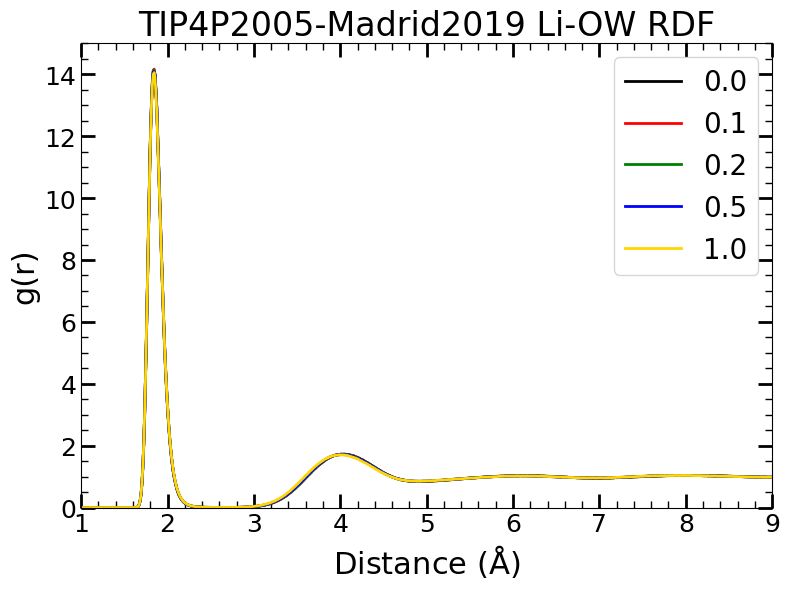

Na: 7.37 at 2.33
Na: 7.36 at 2.33
Na: 7.32 at 2.33
Na: 7.28 at 2.33
Na: 7.18 at 2.33


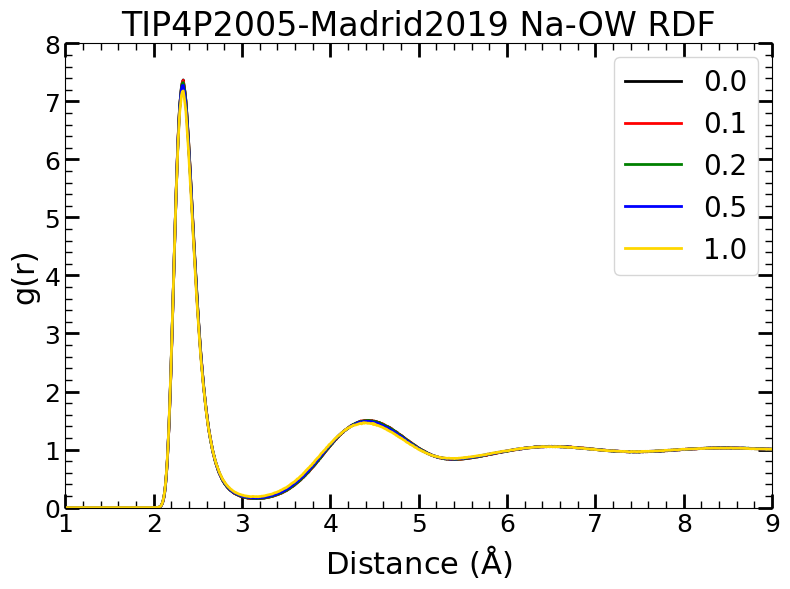

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.0V_1/rdf-OW.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.0V_14/rdf-OW.xvg
K: 4.71 at 2.73
K: 4.69 at 2.73
K: 4.68 at 2.73
K: 4.63 at 2.73
K: 4.54 at 2.73


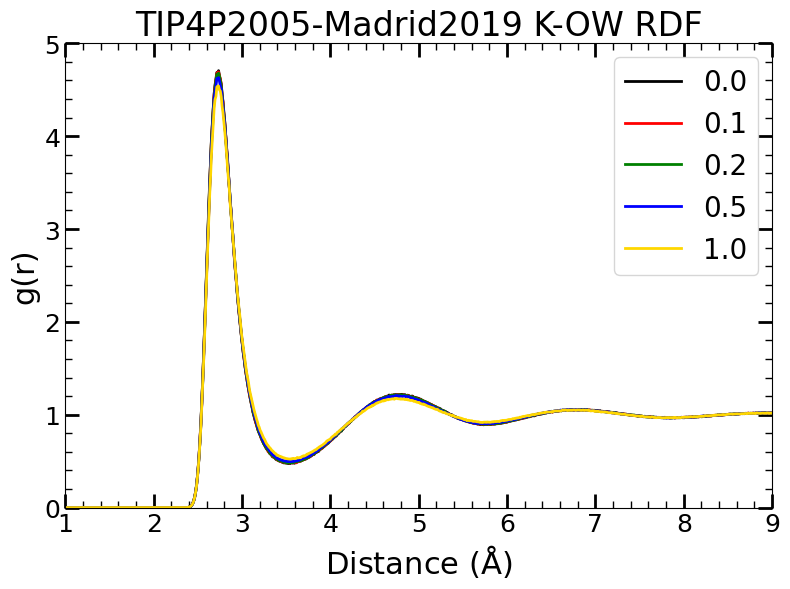

Rb: 3.95 at 2.75
Rb: 3.95 at 2.75
Rb: 3.94 at 2.75
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.5V_16/rdf-OW.xvg
Rb: 3.88 at 2.73
Rb: 3.79 at 2.75


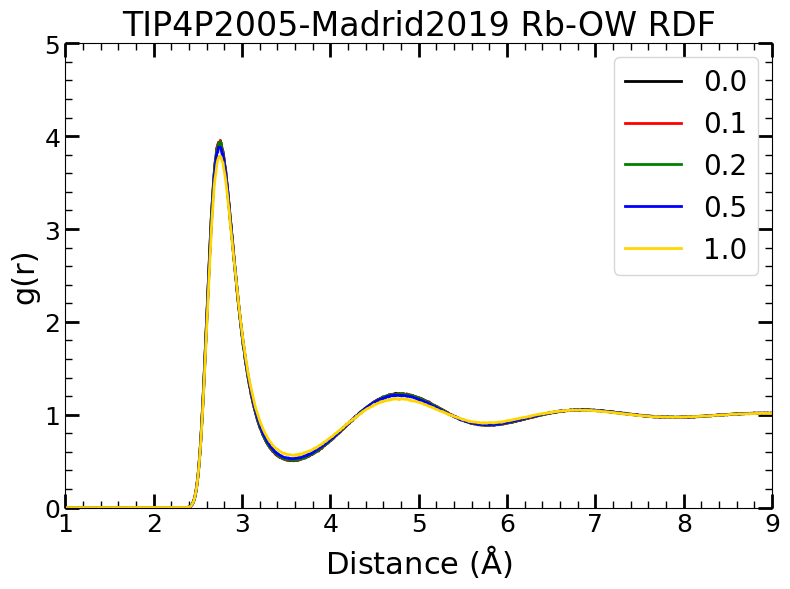

Cs: 3.48 at 2.85
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_8/rdf-OW.xvg
Cs: 3.48 at 2.85
Cs: 3.46 at 2.85
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_12/rdf-OW.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_13/rdf-OW.xvg
Cs: 3.43 at 2.85
Cs: 3.36 at 2.85


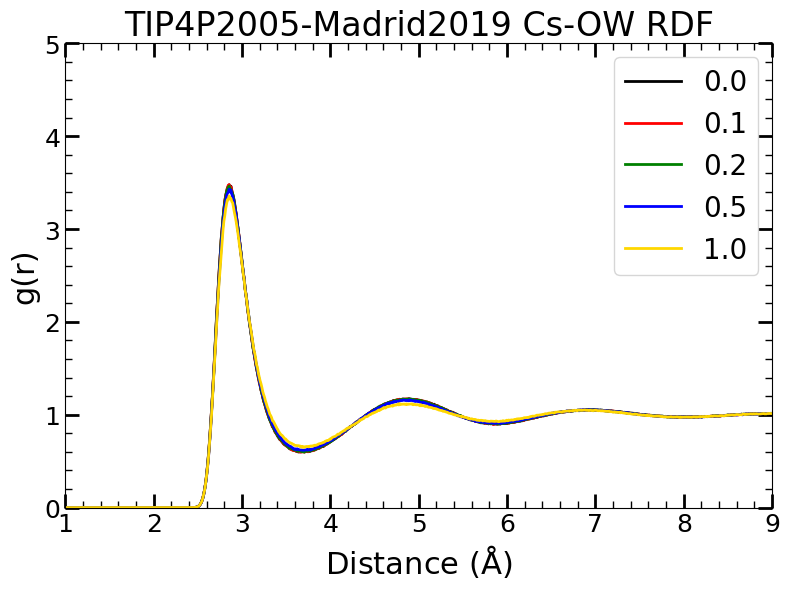

Cl: 3.66 at 3.04
Cl: 3.66 at 3.04
Cl: 3.66 at 3.04
Cl: 3.63 at 3.02
Cl: 3.58 at 3.04


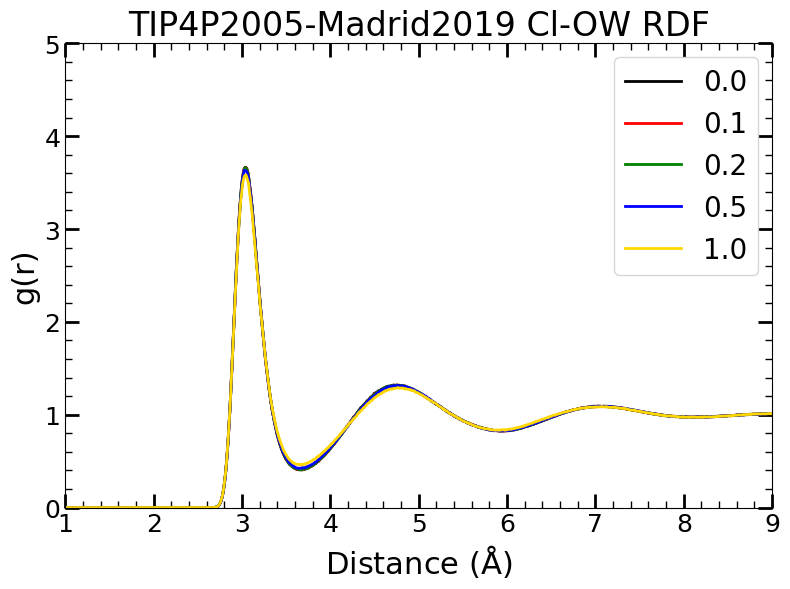

In [2]:
plt.style.use('rcParams.mplstyle')

for ion in catl + anl:
    fig, ax = plt.subplots(figsize=(8, 6))
    if ion == anl[0]:
        cation = catl[0]
        anion = ion
    else:
        cation = ion
        anion = anl[0]
    for efield in efields:
        all = dict()
        avg = dict()
        err = dict()
        all[ion] = []
        avg[ion] = []
        err[ion] = []
        x = []
        for i in range(1, 17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{i}/"
            columns = ['x', cation, anion]
            y = dict()
            for col in columns:
                y[col] = []
            try:
                with open(simpath+f'rdf-OW.xvg') as f:
                    lines = f.readlines()
                    for col in columns:
                        for line in lines:
                            if line[0] == '#' or line[0] == '@':
                                continue
                            y[col].append(float(line.split()[columns.index(col)]))
                    for col in columns:
                        y[col] = np.array(y[col])
                    all[ion].append(y[ion])
                x = y['x']
            except:
                print(f"Could not open {simpath+f'rdf-OW.xvg'}")
                continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

        if len(x) > 0:
            if len(all[ion]) > 1:
                avg[ion] = np.mean(all[ion], axis=0)
            elif len(all[anl[0]]) == 1:
                avg[ion] = all[ion][0]
            if len(all[ion]) > 0:
                ax.plot(x, avg[ion], label=f"{efield}", color=colors[efields.index(efield)])
                print(f"{ion}: {max(avg[ion]):.2f} at {x[np.argmax(avg[ion])]:.2f}")
        ax.legend()
        ax.set_xlim(1, 9)
        if ion == "Li":
            ax.set_ylim(0, 15)
        elif ion == "Na":
            ax.set_ylim(0, 8)
        elif ion == "K":
            ax.set_ylim(0, 5)
        elif ion == "Rb":
            ax.set_ylim(0, 5)
        elif ion == "Cs":
            ax.set_ylim(0, 5)
        elif ion == "Cl":
            ax.set_ylim(0, 5)

        # ax.set_ylim(0, 15)
        ax.set_xlabel("Distance ($\mathrm{\AA}$)")
        ax.set_ylabel("g(r)")
        ax.set_title(f"{watermodel}-{ionmodel} {ion}-OW RDF")
    plt.tight_layout()
    plt.show()




<>:61: SyntaxWarning: invalid escape sequence '\m'
<>:61: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2025123/1010400533.py:61: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")


Li: 3.75 at 2.44
Li: 3.74 at 2.48
Li: 3.75 at 2.46
Li: 3.73 at 2.44
Li: 3.72 at 2.44


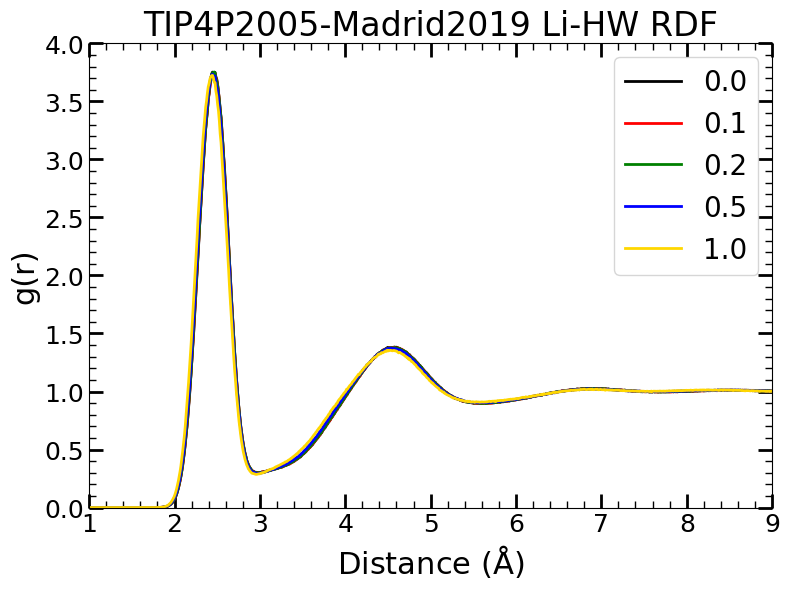

Na: 2.76 at 2.90
Na: 2.76 at 2.88
Na: 2.76 at 2.90
Na: 2.74 at 2.88
Na: 2.72 at 2.85


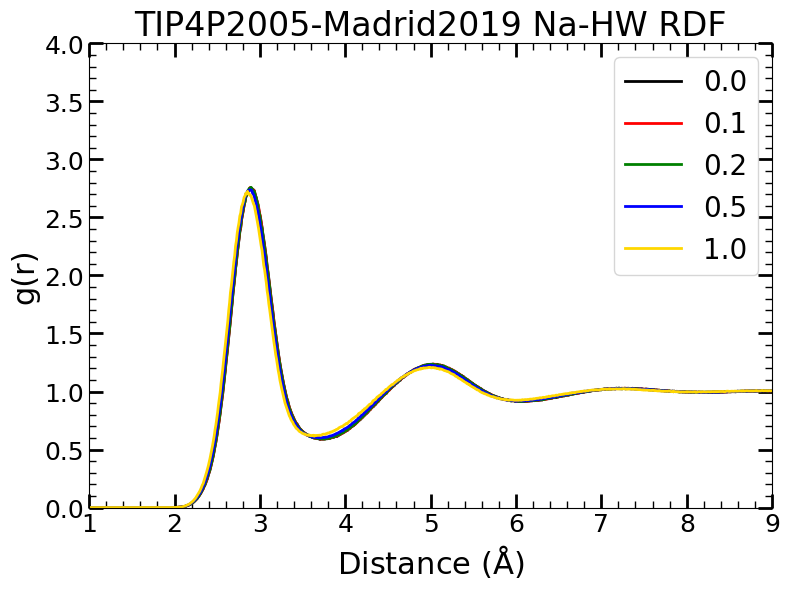

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.0V_1/rdf-HW.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.0V_14/rdf-HW.xvg
K: 2.17 at 3.25
K: 2.17 at 3.25
K: 2.17 at 3.25
K: 2.16 at 3.23
K: 2.12 at 3.23


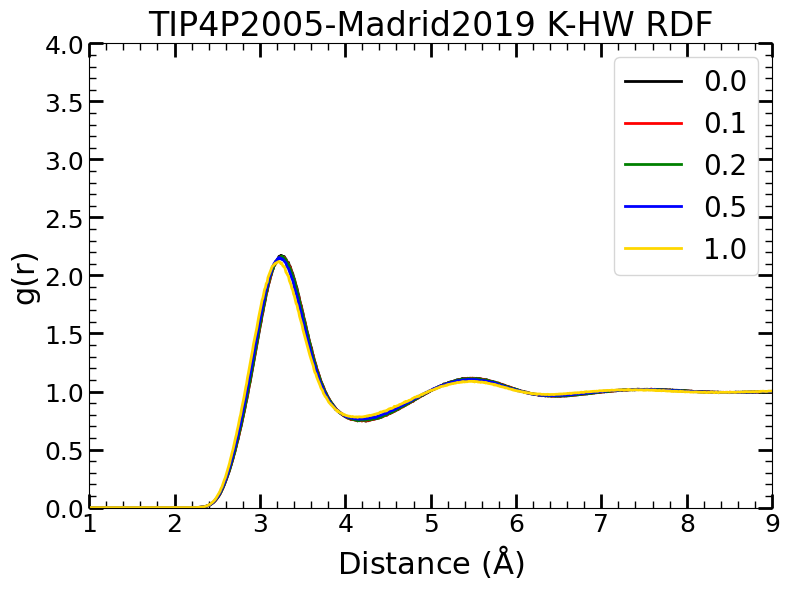

Rb: 2.04 at 3.29
Rb: 2.04 at 3.29
Rb: 2.03 at 3.27
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.5V_16/rdf-HW.xvg
Rb: 2.02 at 3.27
Rb: 1.98 at 3.25


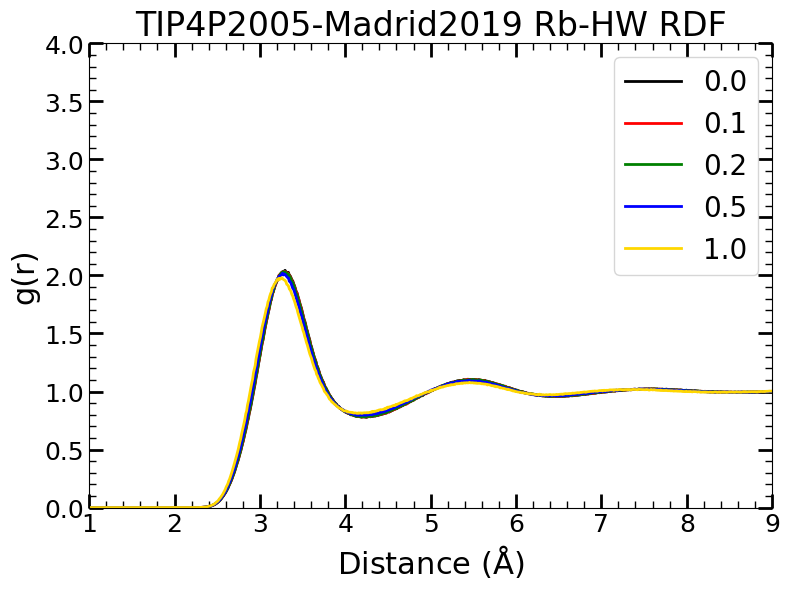

Cs: 1.92 at 3.38
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_8/rdf-HW.xvg
Cs: 1.92 at 3.38
Cs: 1.92 at 3.38
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_12/rdf-HW.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_13/rdf-HW.xvg
Cs: 1.91 at 3.36
Cs: 1.87 at 3.33


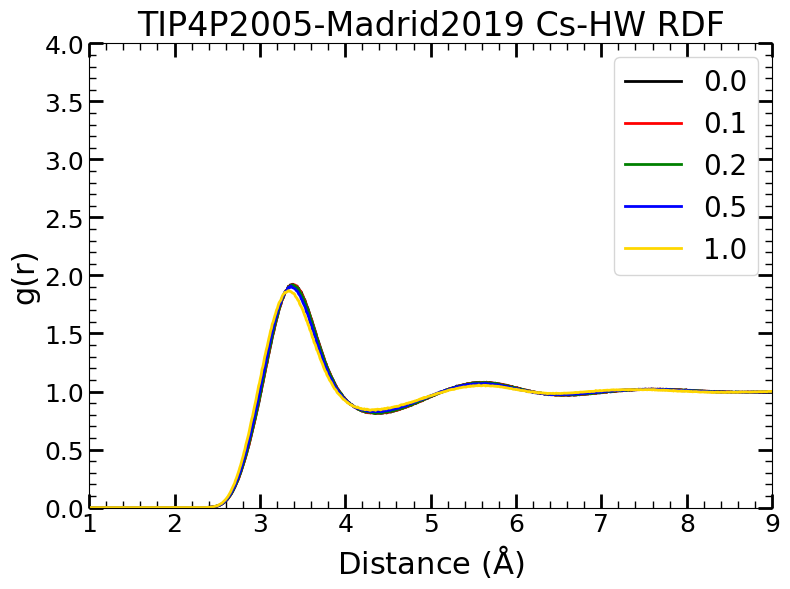

Cl: 3.52 at 2.09
Cl: 3.51 at 2.09
Cl: 3.51 at 2.11
Cl: 3.49 at 2.10
Cl: 3.41 at 2.09


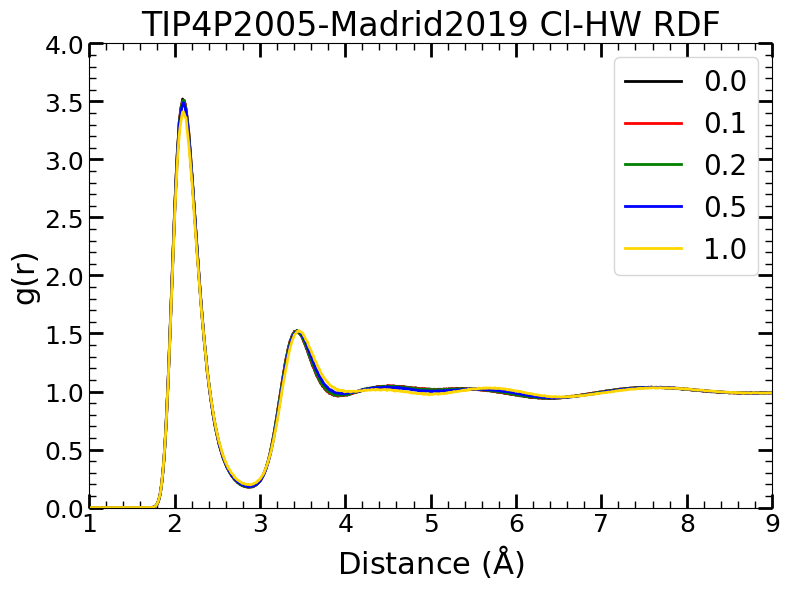

In [3]:
plt.style.use('rcParams.mplstyle')

for ion in catl + anl:
    fig, ax = plt.subplots(figsize=(8, 6))
    x = []
    if ion == anl[0]:
        cation = catl[0]
        anion = ion
    else:
        cation = ion
        anion = anl[0]
    for efield in efields:
        all = dict()
        avg = dict()
        err = dict()
        all[ion] = []
        avg[ion] = []
        err[ion] = []
        for i in range(1, 17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{i}/"
            columns = ['x', cation, anion]
            y = dict()
            for col in columns:
                y[col] = []
            try:
                with open(simpath+f'rdf-HW.xvg') as f:
                    lines = f.readlines()
                    for col in columns:
                        for line in lines:
                            if line[0] == '#' or line[0] == '@':
                                continue
                            y[col].append(float(line.split()[columns.index(col)]))
                    for col in columns:
                        y[col] = np.array(y[col])
                    all[ion].append(y[ion])
                x = y['x']
            except:
                print(f"Could not open {simpath+f'rdf-HW.xvg'}")
                continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

        if len(x) > 0:
            if len(all[ion]) > 1:
                avg[ion] = np.mean(all[ion], axis=0)
            elif len(all[anl[0]]) == 1:
                avg[ion] = all[ion][0]
            if len(all[ion]) > 0:
                ax.plot(x, avg[ion], label=f"{efield}", color=colors[efields.index(efield)])
                print(f"{ion}: {max(avg[ion]):.2f} at {x[np.argmax(avg[ion])]:.2f}")
        ax.legend()
        ax.set_xlim(1, 9)
        ax.set_ylim(0, 4)
        # if ion == "Li":
        #     ax.set_xlim(1.8, 1.9)
        #     ax.set_ylim(13.5, 14.5)

        # ax.set_ylim(0, 15)
        ax.set_xlabel("Distance ($\mathrm{\AA}$)")
        ax.set_ylabel("g(r)")
        ax.set_title(f"{watermodel}-{ionmodel} {ion}-HW RDF")
    plt.tight_layout()
    plt.show()




<>:63: SyntaxWarning: invalid escape sequence '\m'
<>:63: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2025123/1741455696.py:63: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")


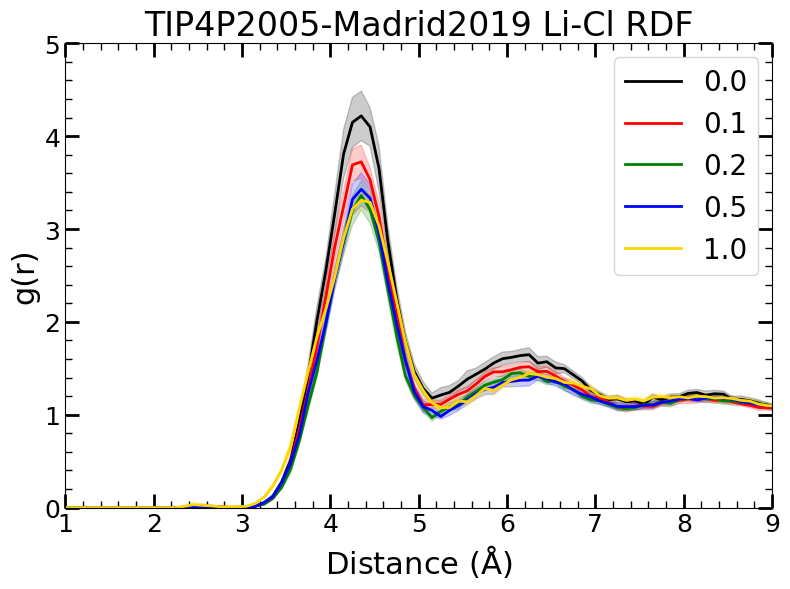

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_1.0V_12/rdf-Na-Cl.xvg


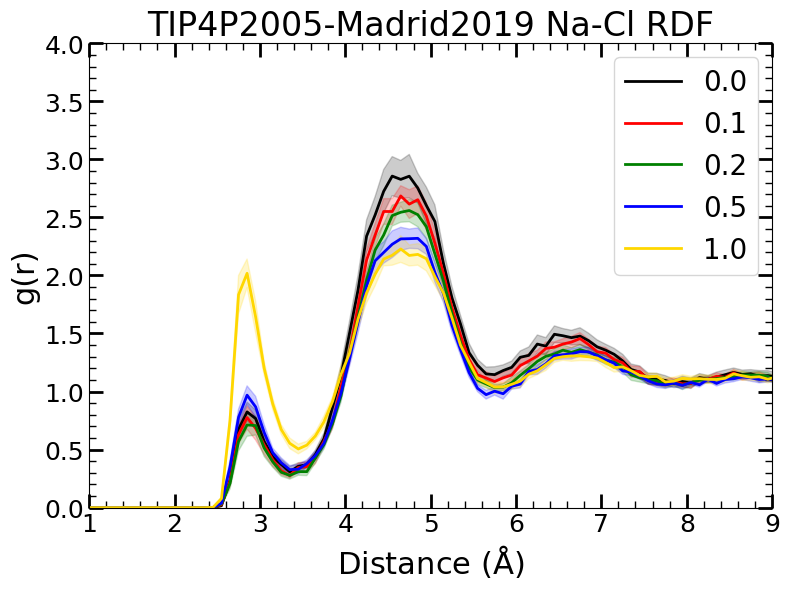

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.0V_1/rdf-K-Cl.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.0V_14/rdf-K-Cl.xvg


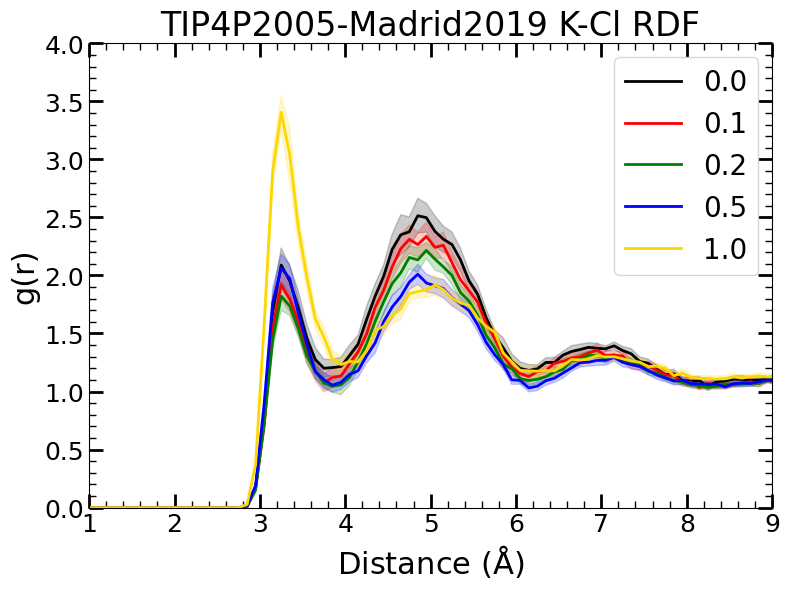

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.5V_16/rdf-Rb-Cl.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_1.0V_9/rdf-Rb-Cl.xvg


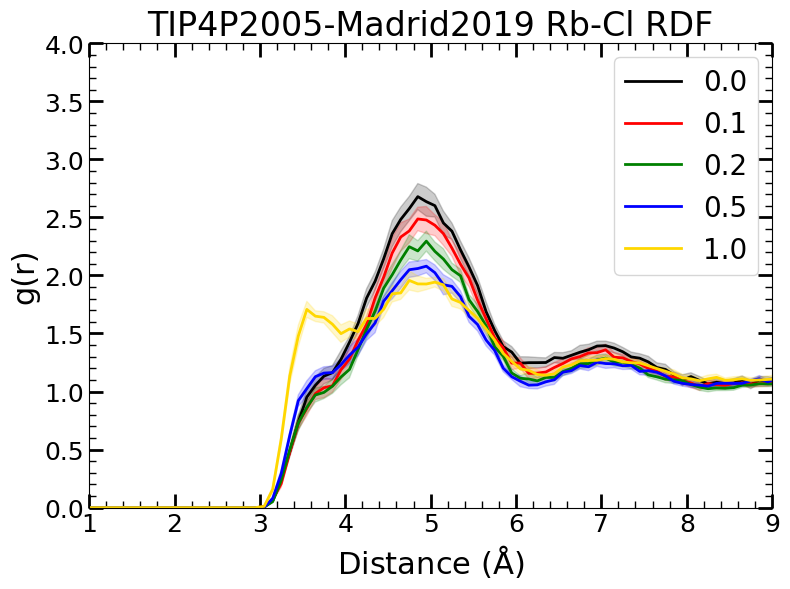

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_8/rdf-Cs-Cl.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_7/rdf-Cs-Cl.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_12/rdf-Cs-Cl.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_13/rdf-Cs-Cl.xvg


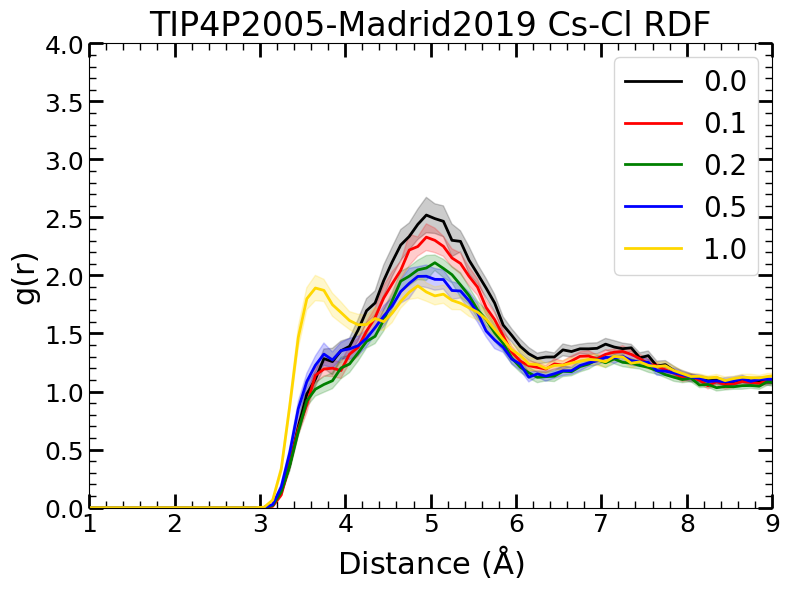

In [4]:
plt.style.use('rcParams.mplstyle')

for ion in catl:
    fig, ax = plt.subplots(figsize=(8, 6))
    cation = ion
    anion = anl[0]
    for efield in efields:
        all = dict()
        avg = dict()
        err = dict()
        all[ion] = []
        avg[ion] = []
        err[ion] = []
        x = []
        for i in range(1, 17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{i}/"
            columns = ['x', cation]
            y = dict()
            for col in columns:
                y[col] = []
            try:
                with open(simpath+f'rdf-{cation}-{anion}.xvg') as f:
                    lines = f.readlines()
                    for col in columns:
                        for line in lines:
                            if line[0] == '#' or line[0] == '@':
                                continue
                            y[col].append(float(line.split()[columns.index(col)]))
                    for col in columns:
                        y[col] = np.array(y[col])
                    all[ion].append(y[ion])
                x = y['x']
            except:
                print(f"Could not open {simpath+f'rdf-{cation}-{anion}.xvg'}")
                continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

        if len(x) > 0:
            if len(all[ion]) > 1:
                avg[ion] = np.mean(all[ion], axis=0)
                err[ion] = 1.96*np.std(all[ion], axis=0)/np.sqrt(len(all[ion]))
                ax.plot(x, avg[ion], label=f"{efield}", color=colors[efields.index(efield)])
                ax.fill_between(x, avg[ion]-err[ion], avg[ion]+err[ion], alpha=0.2, color=colors[efields.index(efield)])
            elif len(all[anl[0]]) == 1:
                avg[ion] = all[ion][0]
        ax.legend()
        ax.set_xlim(1, 9)
        if ion == "Li":
            ax.set_ylim(0, 5)
        elif ion == "Na":
            ax.set_ylim(0, 4)
        elif ion == "K":
            ax.set_ylim(0, 4)
        elif ion == "Rb":
            ax.set_ylim(0, 4)
        elif ion == "Cs":
            ax.set_ylim(0, 4)

        # ax.set_ylim(0, 15)
        ax.set_xlabel("Distance ($\mathrm{\AA}$)")
        ax.set_ylabel("g(r)")
        ax.set_title(f"{watermodel}-{ionmodel} {ion}-{anl[0]} RDF")
    plt.tight_layout()
    plt.show()




<>:61: SyntaxWarning: invalid escape sequence '\m'
<>:61: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2025123/1394539936.py:61: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")
/tmp/ipykernel_2025123/1394539936.py:45: RuntimeWarning: divide by zero encountered in log
  free = -np.log(avg[ion])
/tmp/ipykernel_2025123/1394539936.py:46: RuntimeWarning: invalid value encountered in divide
  free_err = err[ion]/avg[ion]


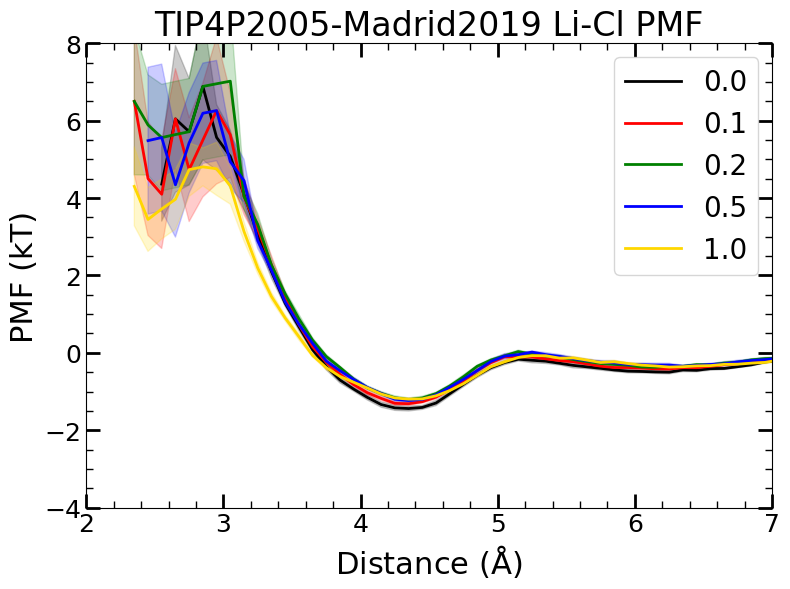

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_1.0V_12/rdf-Na-Cl.xvg


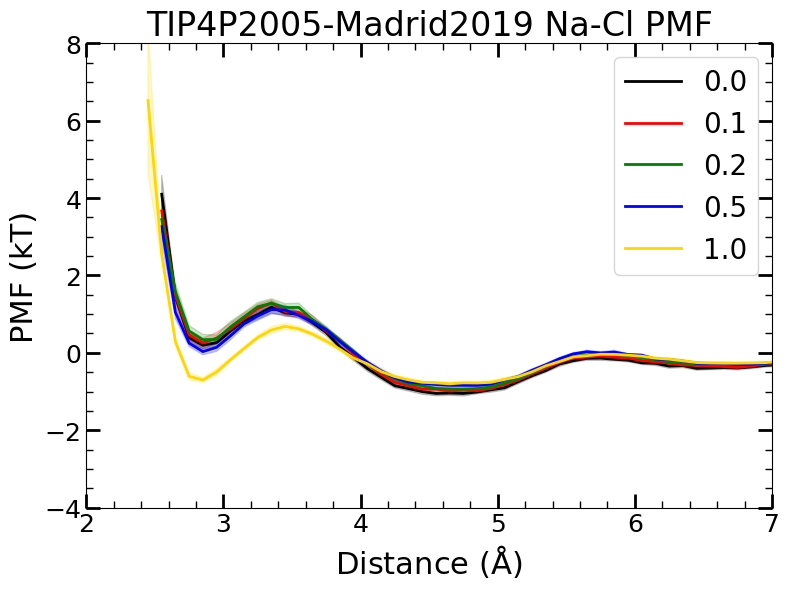

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.0V_1/rdf-K-Cl.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.0V_14/rdf-K-Cl.xvg


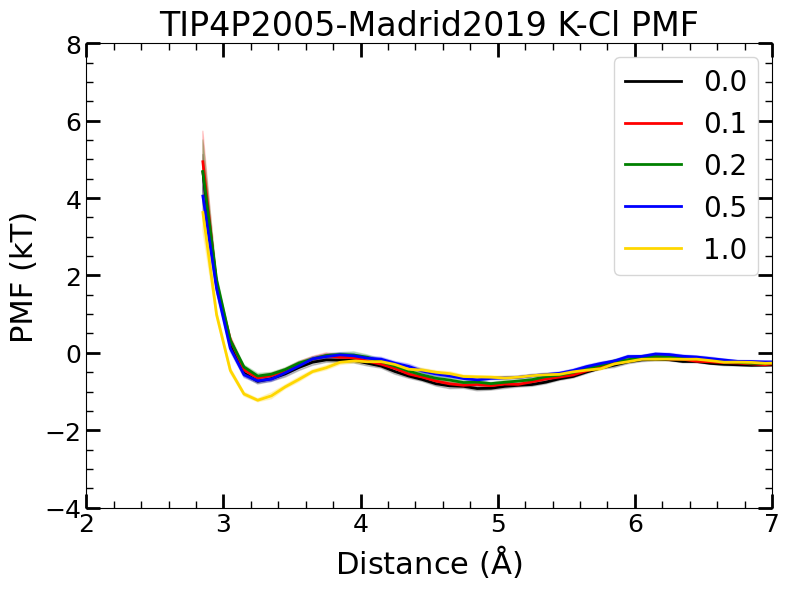

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.5V_16/rdf-Rb-Cl.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_1.0V_9/rdf-Rb-Cl.xvg


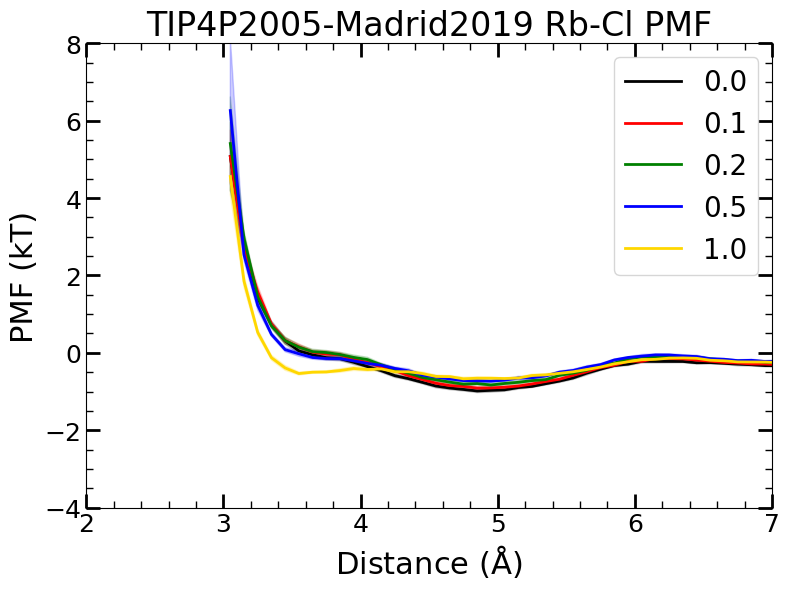

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_8/rdf-Cs-Cl.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_7/rdf-Cs-Cl.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_12/rdf-Cs-Cl.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_13/rdf-Cs-Cl.xvg


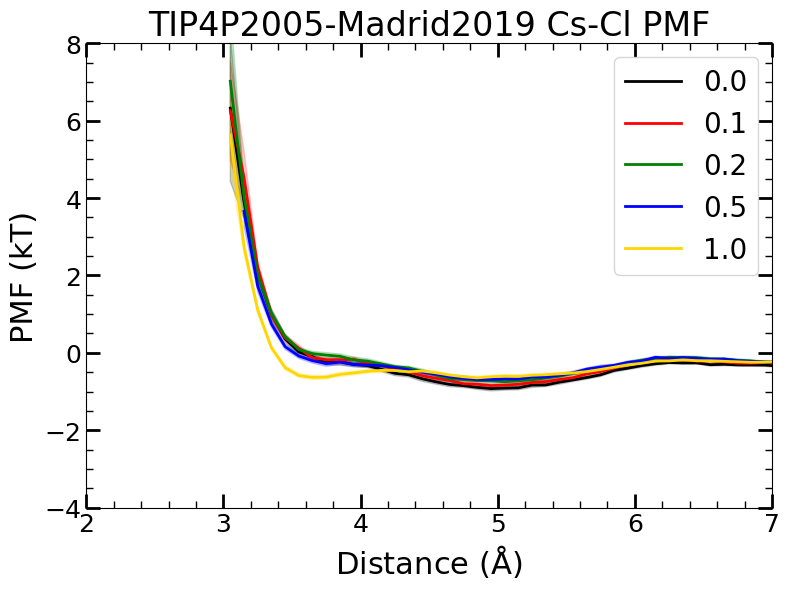

In [5]:
plt.style.use('rcParams.mplstyle')

for ion in catl:
    fig, ax = plt.subplots(figsize=(8, 6))
    cation = ion
    anion = anl[0]
    for efield in efields:
        all = dict()
        avg = dict()
        err = dict()
        all[ion] = []
        avg[ion] = []
        err[ion] = []
        x = []
        for i in range(1, 17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{i}/"
            columns = ['x', cation]
            y = dict()
            for col in columns:
                y[col] = []
            try:
                with open(simpath+f'rdf-{cation}-{anion}.xvg') as f:
                    lines = f.readlines()
                    for col in columns:
                        for line in lines:
                            if line[0] == '#' or line[0] == '@':
                                continue
                            y[col].append(float(line.split()[columns.index(col)]))
                    for col in columns:
                        y[col] = np.array(y[col])
                    all[ion].append(y[ion])
                x = y['x']
            except:
                print(f"Could not open {simpath+f'rdf-{cation}-{anion}.xvg'}")
                continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

        if len(x) > 0:
            if len(all[ion]) > 1:
                avg[ion] = np.mean(all[ion], axis=0)
                err[ion] = 1.96*np.std(all[ion], axis=0)/np.sqrt(len(all[ion]))
                free = -np.log(avg[ion])
                free_err = err[ion]/avg[ion]
                ax.plot(x, free, label=f"{efield}", color=colors[efields.index(efield)])
                ax.fill_between(x, free-free_err, free+free_err, alpha=0.2, color=colors[efields.index(efield)])
                # ax.plot(x, avg[ion], label=f"{efield}", color=colors[efields.index(efield)])
                # ax.fill_between(x, avg[ion]-err[ion], avg[ion]+err[ion], alpha=0.2, color=colors[efields.index(efield)])
            elif len(all[anl[0]]) == 1:
                avg[ion] = all[ion][0]
        ax.legend()
        ax.set_xlim(2, 7)
        ax.set_ylim(-4, 8)
        # if ion == "Li":
        #     ax.set_xlim(1.8, 1.9)
        #     ax.set_ylim(13.5, 14.5)

        # ax.set_ylim(0, 15)
        ax.set_xlabel("Distance ($\mathrm{\AA}$)")
        ax.set_ylabel("PMF (kT)")
        ax.set_title(f"{watermodel}-{ionmodel} {ion}-{anl[0]} PMF")
    plt.tight_layout()
    plt.show()




<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2025123/337369469.py:80: SyntaxWarning: invalid escape sequence '\c'
  secax.set_xticklabels(['0$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$', '120$^{\circ}$', '180$^{\circ}$'], rotation=45, ha='right')
/tmp/ipykernel_2025123/337369469.py:80: SyntaxWarning: invalid escape sequence '\c'
  secax.set_xticklabels(['0$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$', '120$^{\circ}$', '180$^{\circ}$'], rotation=45, ha='right')
/tmp/ipykernel_2025123/337369469.py:80: SyntaxWarning: inv

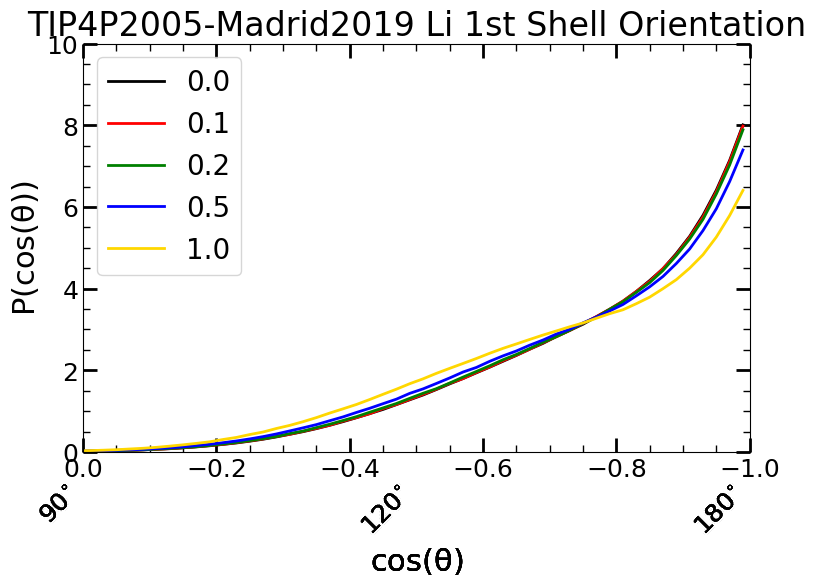

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_1.0V_12/solvation_orientation.xvg


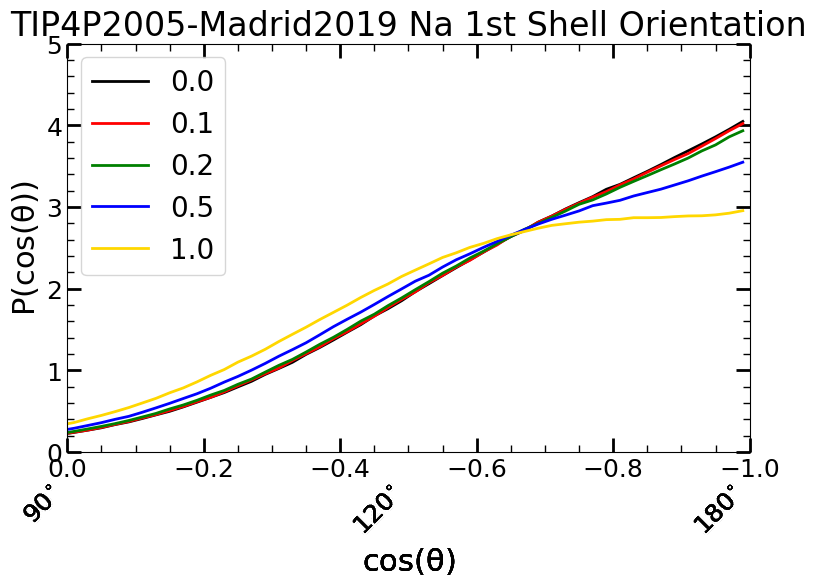

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.0V_1/solvation_orientation.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.0V_14/solvation_orientation.xvg


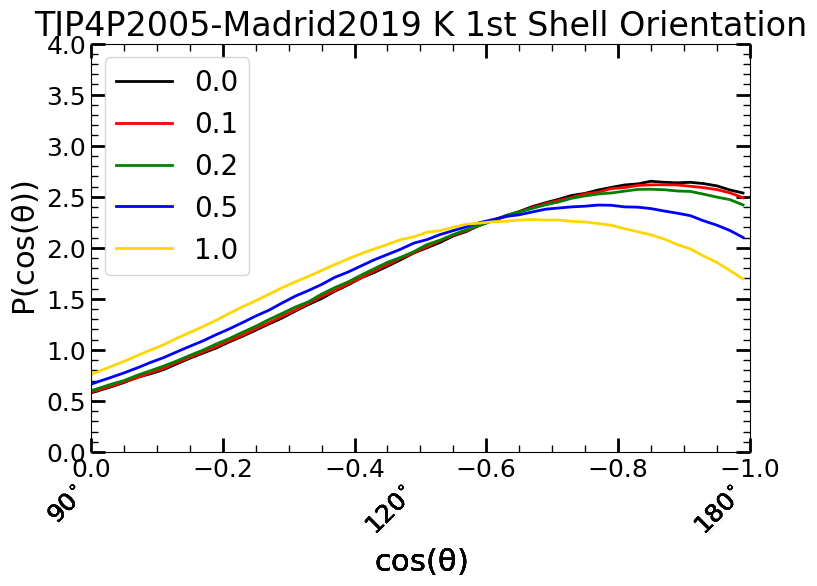

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.5V_16/solvation_orientation.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_1.0V_9/solvation_orientation.xvg


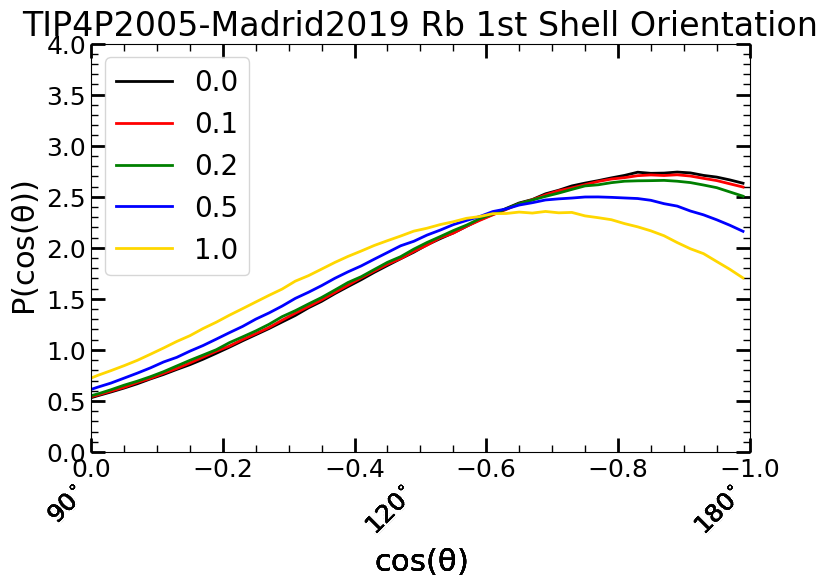

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_8/solvation_orientation.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_7/solvation_orientation.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_12/solvation_orientation.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_13/solvation_orientation.xvg


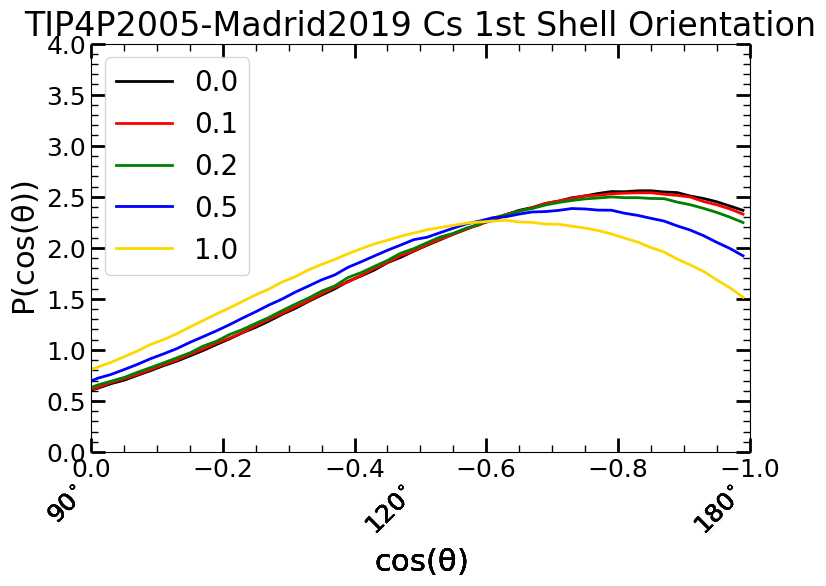

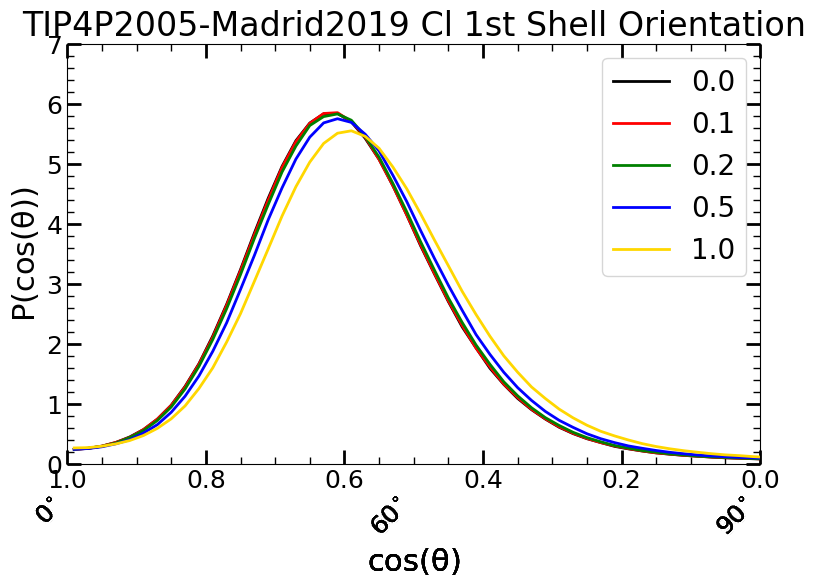

In [6]:
plt.style.use('rcParams.mplstyle')

for ion in catl + anl:
    fig, ax = plt.subplots(figsize=(8, 6))
    if ion == anl[0]:
        cation = catl[0]
        anion = ion
    else:
        cation = ion
        anion = anl[0]
    for efield in efields:
        all = dict()
        avg = dict()
        err = dict()
        all[ion] = []
        avg[ion] = []
        err[ion] = []
        x = []
        for i in range(1, 17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{i}/"
            columns = ['x', cation, anion]
            y = dict()
            for col in columns:
                y[col] = []
            try:
                with open(simpath+f'solvation_orientation.xvg') as f:
                    lines = f.readlines()
                    for col in columns:
                        for line in lines:
                            if line[0] == '#' or line[0] == '@':
                                continue
                            y[col].append(float(line.split()[columns.index(col)]))
                    for col in columns:
                        y[col] = np.array(y[col])
                    all[ion].append(y[ion])
                x = y['x']
            except:
                print(f"Could not open {simpath+f'solvation_orientation.xvg'}")
                continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

        if len(x) > 0:
            if len(all[ion]) > 1:
                avg[ion] = np.mean(all[ion], axis=0)
            elif len(all[ion]) == 1:
                avg[ion] = all[ion][0]
            if len(all[ion]) > 0:
                ax.plot(x, 2*avg[ion], label=f"{efield}", color=colors[efields.index(efield)])
        ax.legend()
        if ion in catl:
            ax.set_xlim(-1, 0)
        else:
            ax.set_xlim(0, 1) 
        if ion == "Li":
            ax.set_ylim(0, 10)
        elif ion == "Na":
            ax.set_ylim(0, 5)
        elif ion == "K":
            ax.set_ylim(0, 4)
        elif ion == "Rb":
            ax.set_ylim(0, 4)
        elif ion == "Cs":
            ax.set_ylim(0, 4)
        elif ion == "Cl":
            ax.set_ylim(0, 7)
        # ax.set_ylim(0, 20)
        # ax.set_yticks([0, 5, 10, 15, 20])

        def arccos_transform(x):
            return np.arccos(x)*180/np.pi

        def cos_transform(x):
            return np.cos(x*np.pi/180)

        secax = ax.secondary_xaxis(-0.06, functions=(arccos_transform, cos_transform))
        secax.set_xticks([0, 60, 90, 120, 180])
        secax.set_xticklabels(['0$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$', '120$^{\circ}$', '180$^{\circ}$'], rotation=45, ha='right')
        secax.spines['bottom'].set_visible(False)
        secax.tick_params(axis='x', which='both', length=0)


        # ax2 = ax.twiny()
        # ax2.set_xticks([np.arccos(-1)*180/np.pi, np.arccos(-np.sqrt(3/4))*180/np.pi, np.arccos(-0.5)*180/np.pi, np.arccos(0)*180/np.pi, np.arccos(0.5)*180/np.pi, np.arccos(np.sqrt(3/4))*180/np.pi, np.arccos(1)*180/np.pi])

        secax.set_xlabel(r'cos($\mathrm{\theta}$)')
        ax.set_ylabel(r'P(cos($\mathrm{\theta}$))')
        # ax.set_xlim(0, 180)
        # ax.axvline(x=np.cos(104.52/2*np.pi/180), color='k', linestyle='--', linewidth=1)
        ax.set_title(f'{watermodel}-{ionmodel} {ion} 1st Shell Orientation')
        ax.legend()
    plt.gca().invert_xaxis()
    plt.tight_layout()
    plt.show()




16


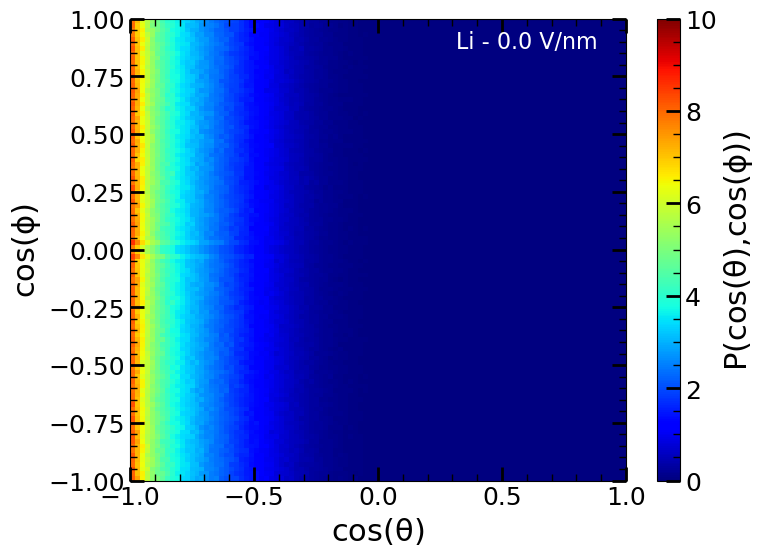

16


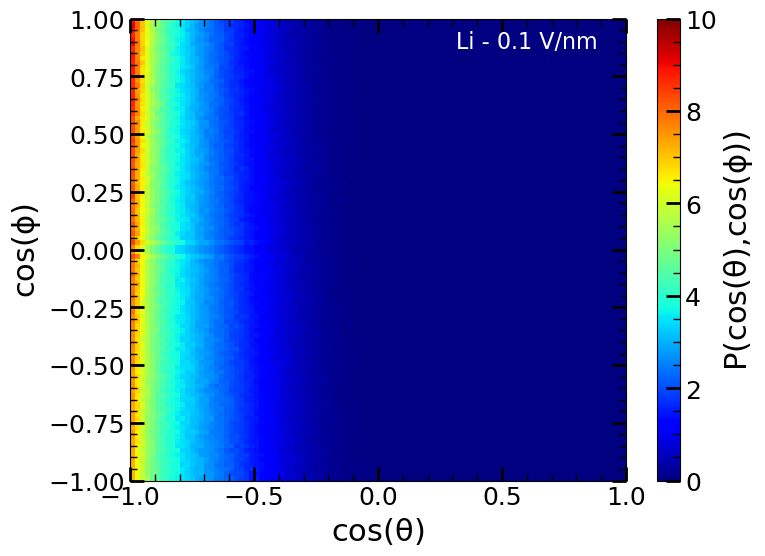

16


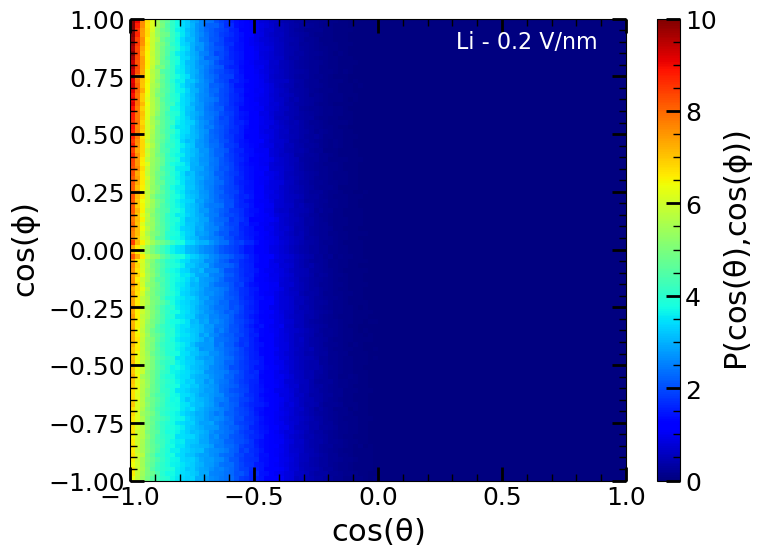

16


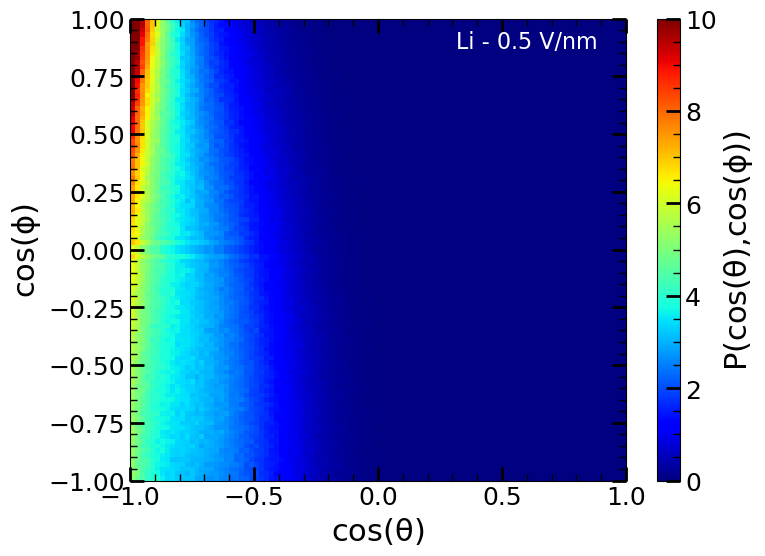

16


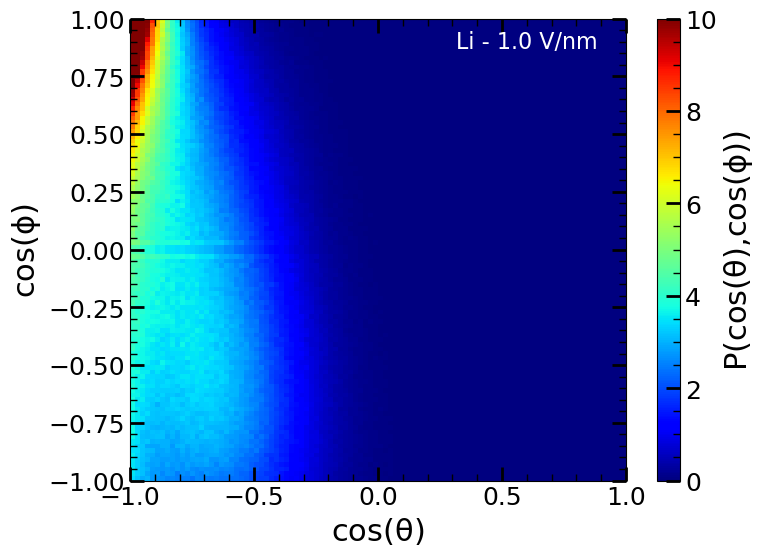

16


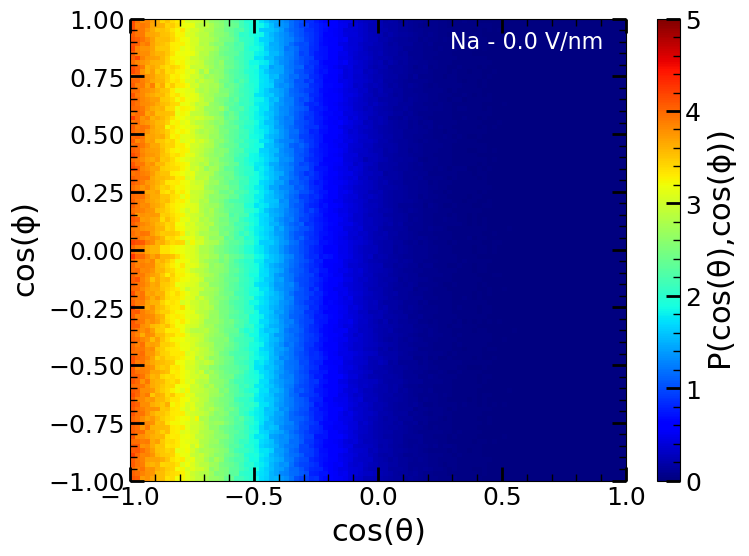

16


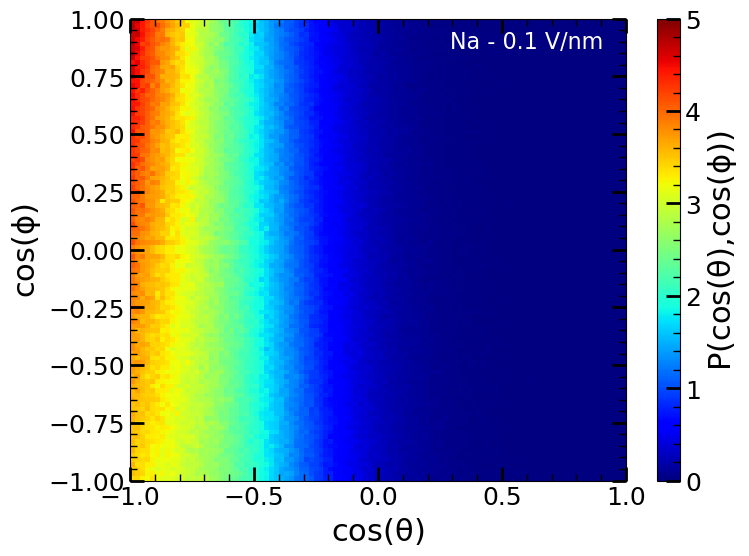

16


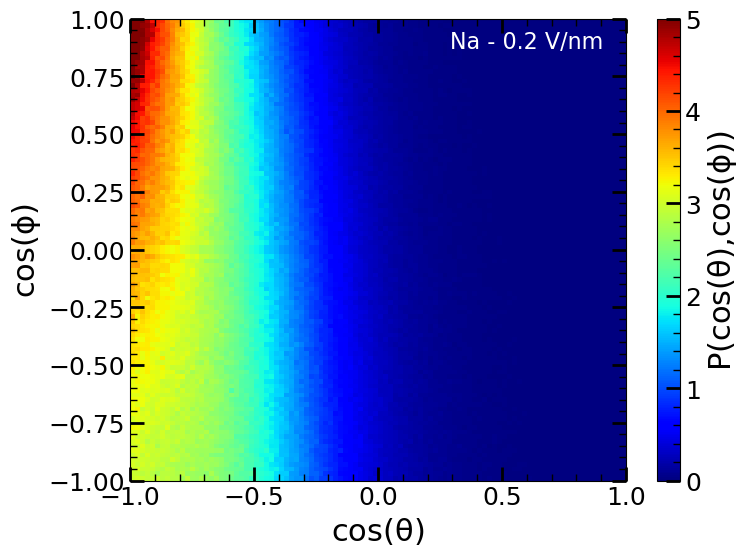

16


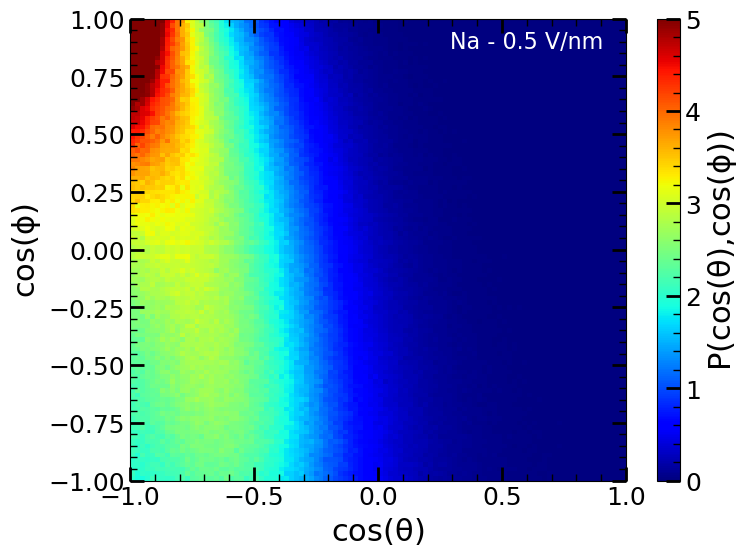

16


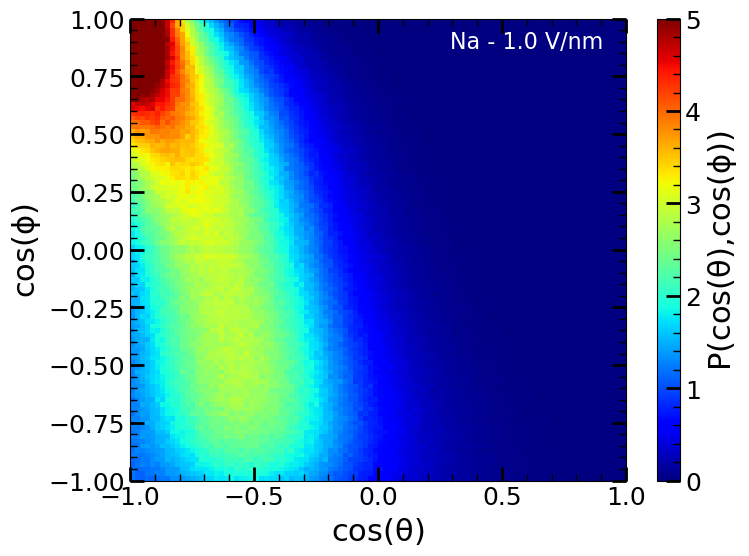

16


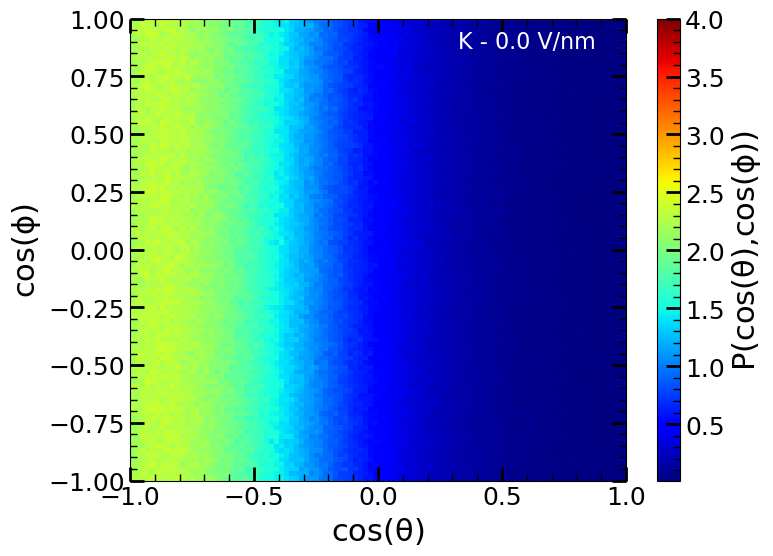

16


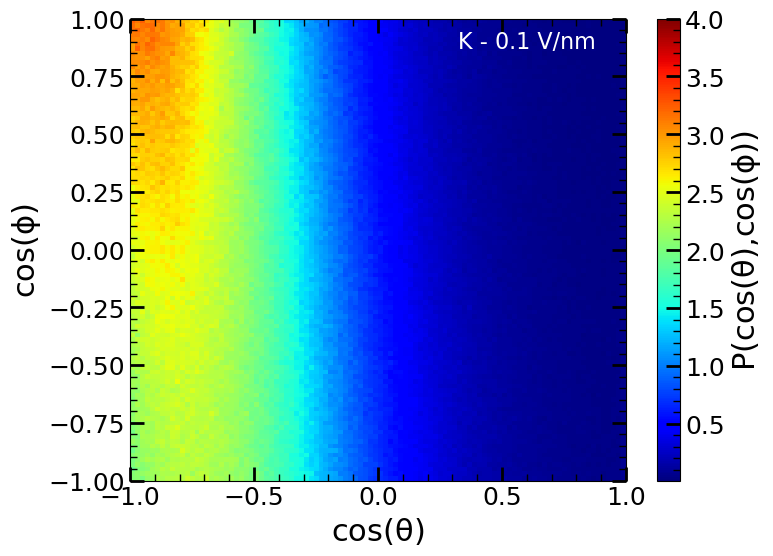

16


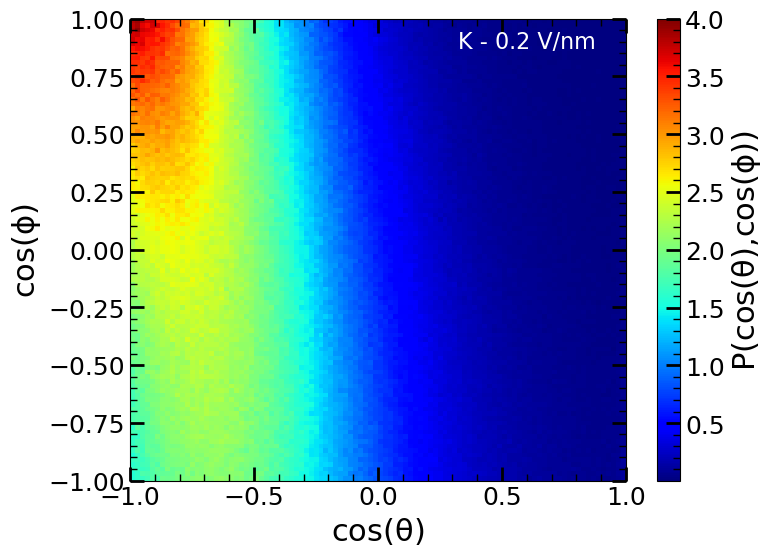

16


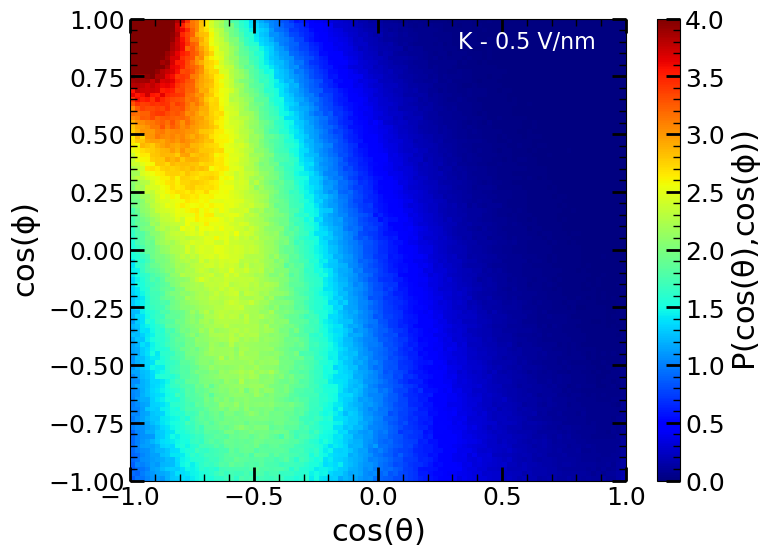

16


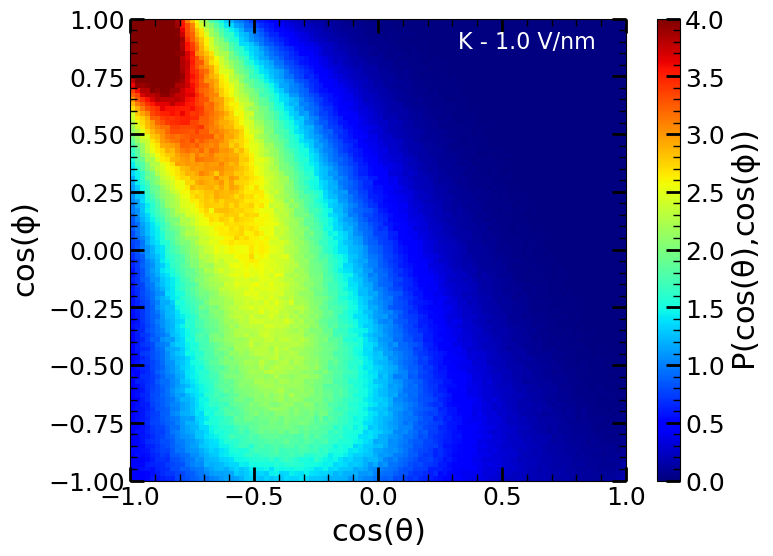

16


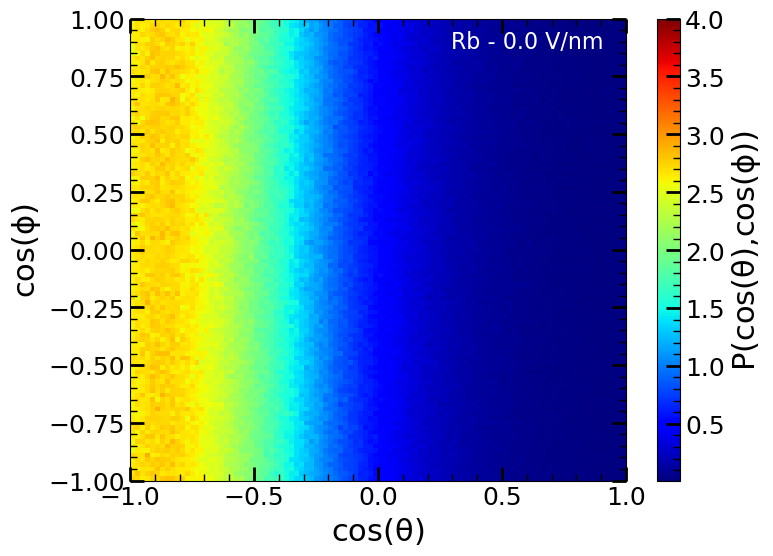

16


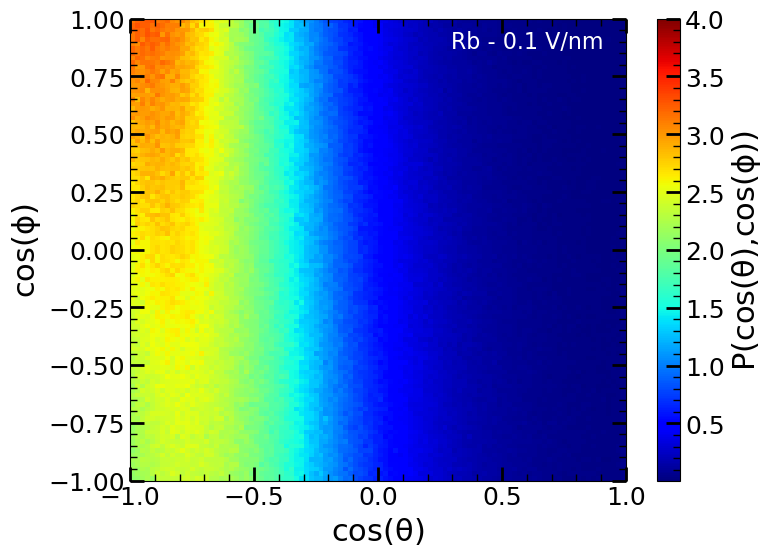

16


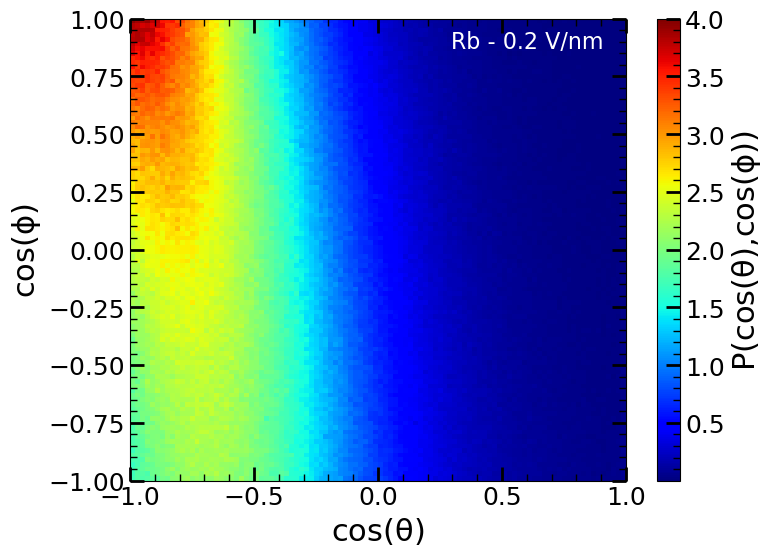

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.5V_16/solvation_fieldRb.xvg
15


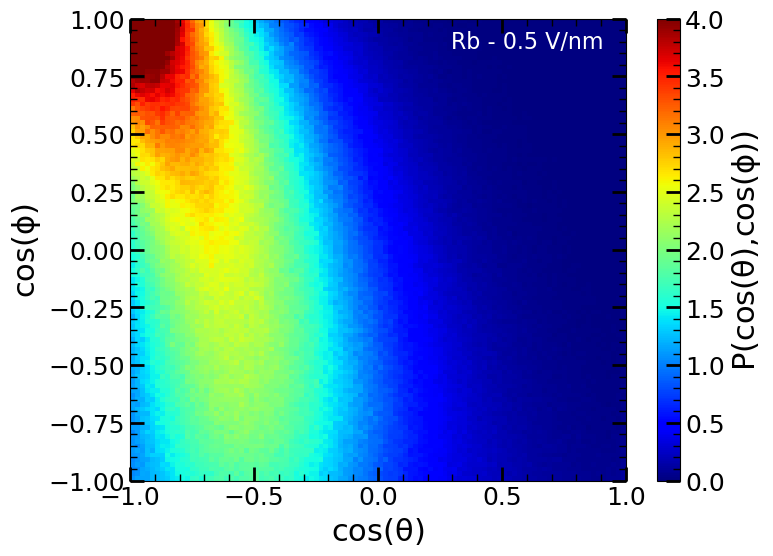

16


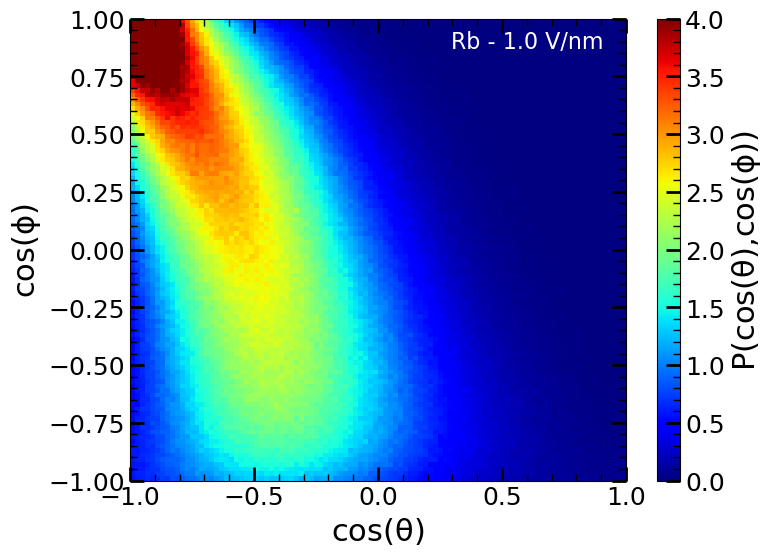

16


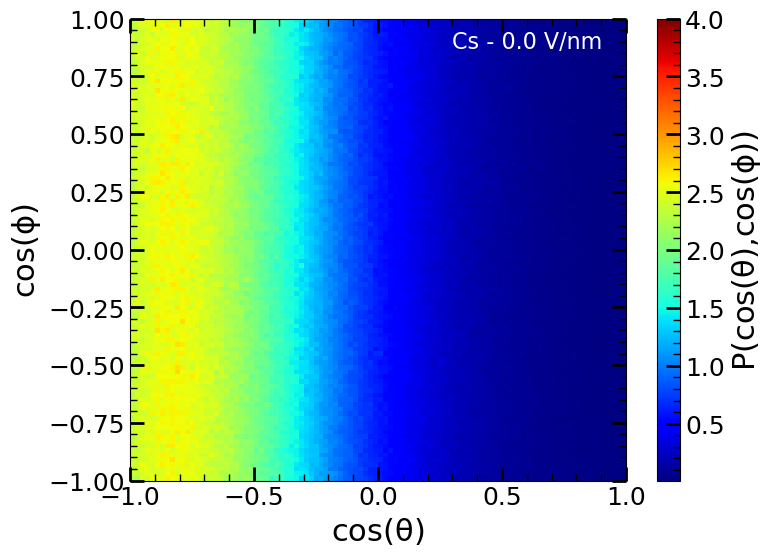

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_8/solvation_fieldCs.xvg
15


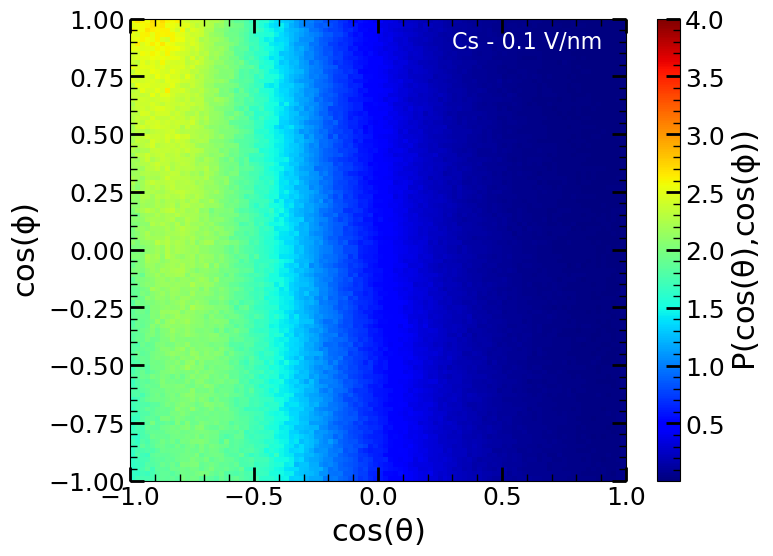

16


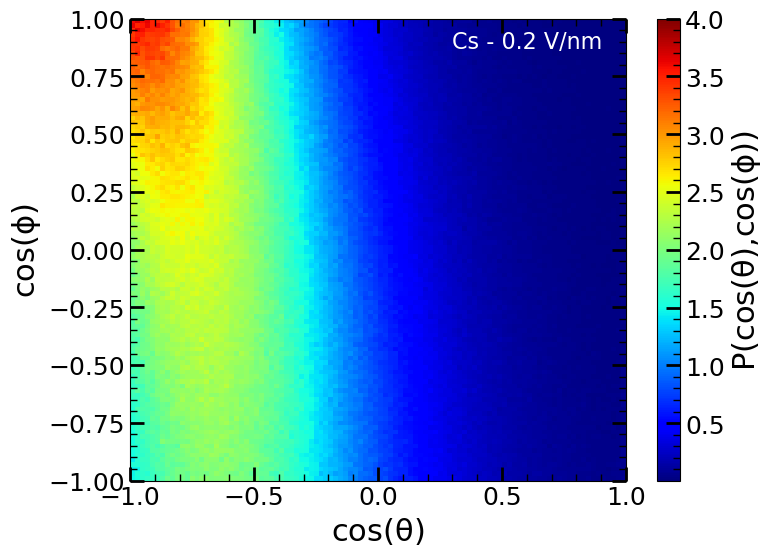

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_12/solvation_fieldCs.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_13/solvation_fieldCs.xvg
14


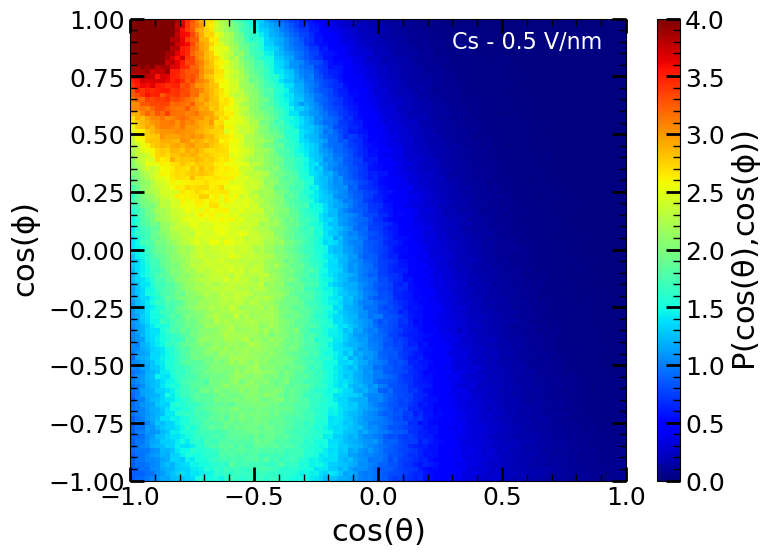

16


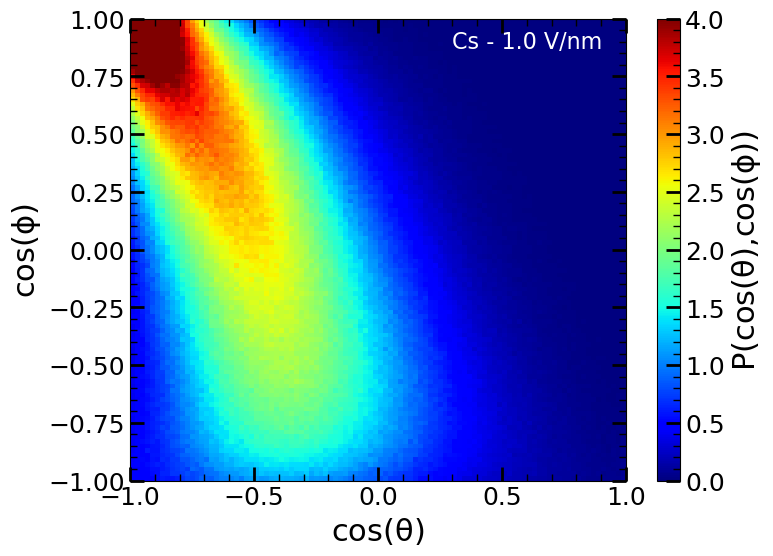

16


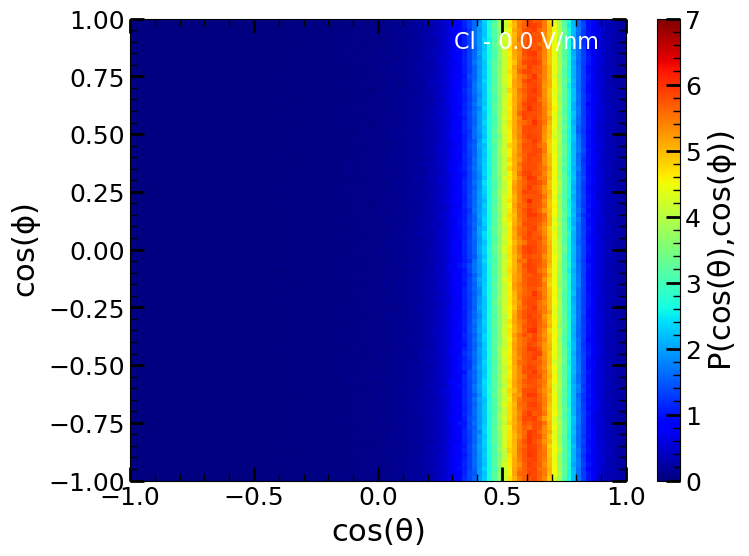

16


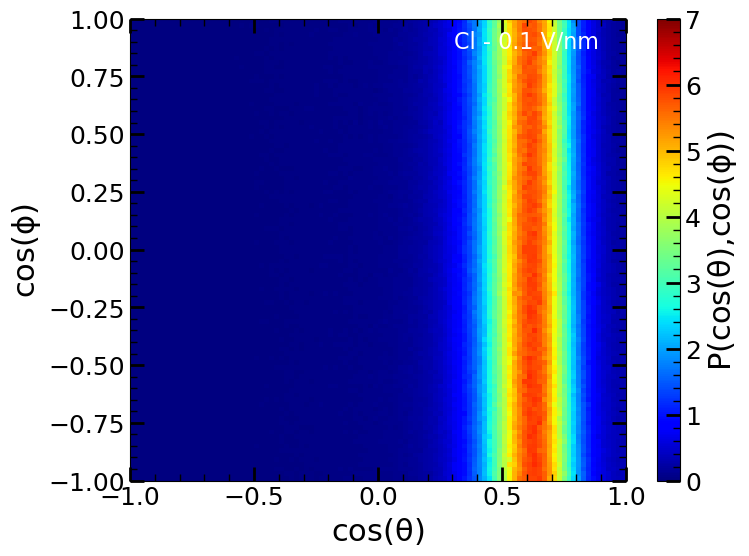

16


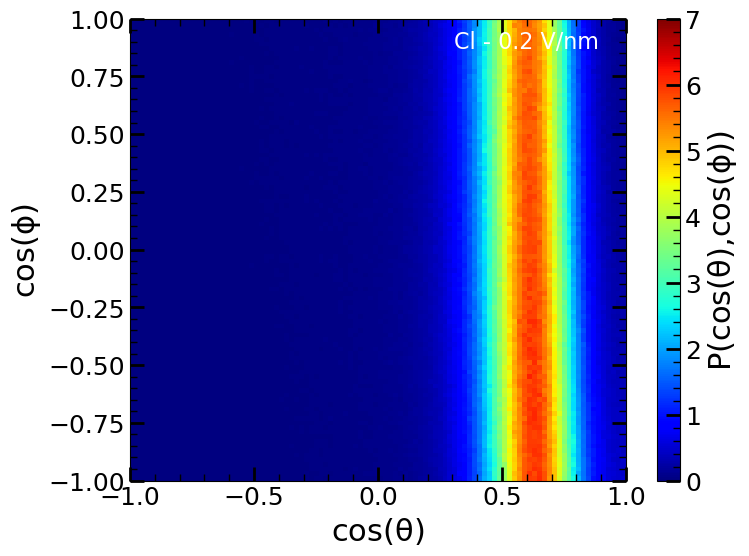

16


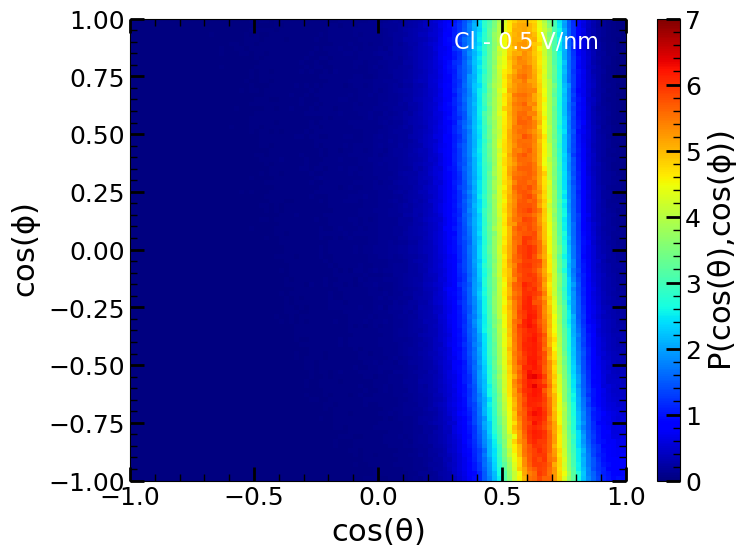

16


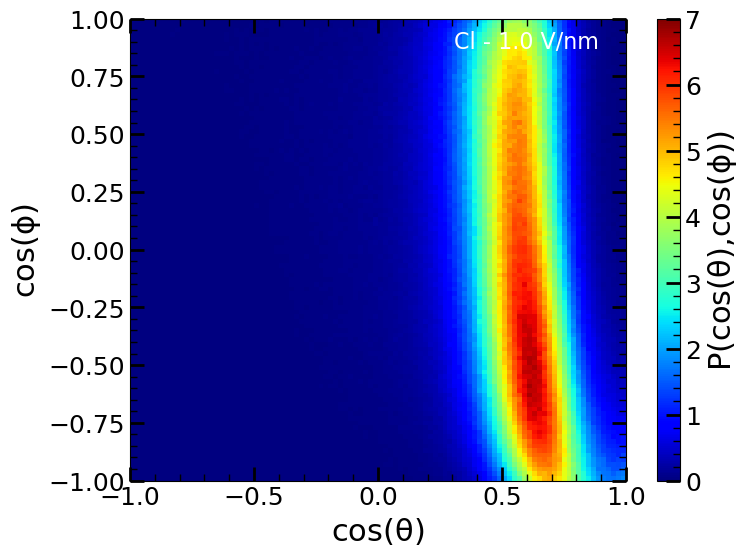

In [7]:
plt.style.use('rcParams.mplstyle')
# cation='Li'
# anion='Cl'
# ion = cation

for ion in catl+anl:
    if ion == anl[0]:
        cation = catl[0]
        anion = ion
    else:
        cation = ion
        anion = anl[0]
    for efield in efields:
        num_success = 0
        cnt_total = 0
        for n in range(1,17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{n}/"
            xvg_file = f'{simpath}solvation_field{ion}.xvg'

            try:
                with open(xvg_file, 'r') as f:
                    centers_x = []
                    centers_y = []
                    count = 0
                    for line in f:
                        # skip lines starting with # and @
                        if line.startswith(('#', '@')):
                            continue
                        else:
                            # obtain the x values (first column) and y values for specified columns
                            values = line.split()
                            if count == 0:
                                bins = [int(v) for v in values]
                                cnt = np.zeros((bins[0],bins[1]))
                            elif count == 1:
                                centers_y = [float(v) for v in values]
                            elif count < bins[1]+2:
                                centers_x.append(float(values[0]))
                                for i in range(bins[0]):
                                    cnt[count-2,i] = float(values[i+1])

                            count += 1
                num_success += 1  
                if num_success == 1:
                    cnt_total = cnt
                else:
                    cnt_total += cnt 
            except:
                print(f"Could not open {xvg_file}")
                continue

        print(num_success)
        if num_success > 0:
            cnt_total /= num_success
            # plot histograms with borders
            plt.figure(figsize=(8,6))
            # plt.pcolormesh(x,y,cnt, edgecolors='k', linewidth=0.5)
            # use the jet colorbar
            # use upper limit of 0.8
            if ion == "Li":
                vm = 10
            elif ion == "Na":
                vm = 5
            elif ion == "K":
                vm = 4
            elif ion == "Rb":
                vm = 4
            elif ion == "Cs":
                vm = 4
            elif ion == "Cl":
                vm = 7

            # correct for rounding to 0
            centersum = cnt_total[:,49] + cnt_total[:,50]
            cnt_total[:,49] = centersum / 2
            cnt_total[:,50] = centersum / 2
            plt.pcolormesh(centers_y,centers_x,4*cnt_total.T, cmap='jet', vmax=vm)
            # plt.contourf(centers_y,centers_x,4*cnt.T, cmap='jet', levels=100, vmax=vm)
            plt.colorbar(label=r'P(cos($\mathrm{\theta}$),cos($\mathrm{\phi}$))')
            # plt.xlim(-7,7)
            # plt.ylim(-200,200)
            # plt.xlim(-25,25)
            # set y axis labels
            # plt.yticks([-180,-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
            # plt.gca().set_aspect('equal', adjustable='box')
            # plt.xlabel('z ($\mathrm{\AA}$)')
            plt.xlabel(r'cos($\mathrm{\theta}$)')
            plt.ylabel(r'cos($\mathrm{\phi}$)')
            # put a label within the plot for the cation and the efield
            plt.text(0.8, 0.95, f'{ion} - {efield} V/nm', horizontalalignment='center', verticalalignment='center', transform = plt.gca().transAxes, fontsize=16, color='white')
            # plt.title('Coordination Map: '+ion_to_study)
            plt.show()

<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:76: SyntaxWarning: invalid escape sequence '\m'
<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:76: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2025123/1689651697.py:74: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label='Density ($\mathrm{\AA}^{-3}$)')
/tmp/ipykernel_2025123/1689651697.py:75: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Distance ($\mathrm{\AA}$)')
/tmp/ipykernel_2025123/1689651697.py:76: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$(\mathrm{cos(\phi)})$')


16
0.5961298313412015


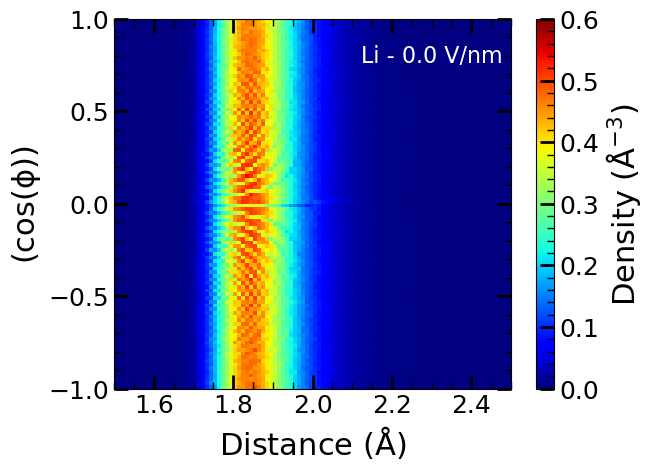

16
0.6012830304494222


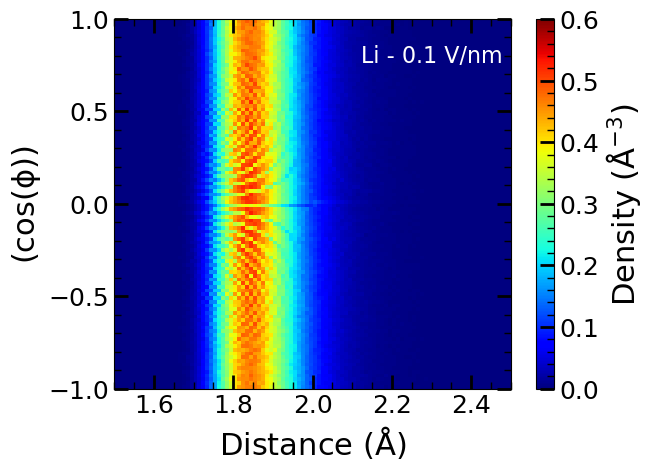

16
0.5937920672967262


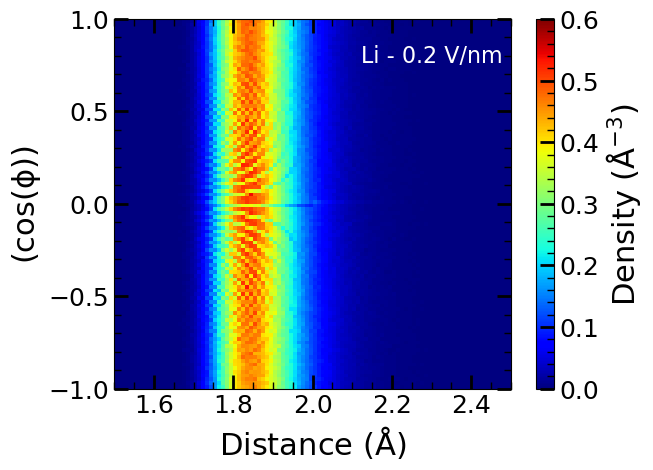

16
0.5914543032522509


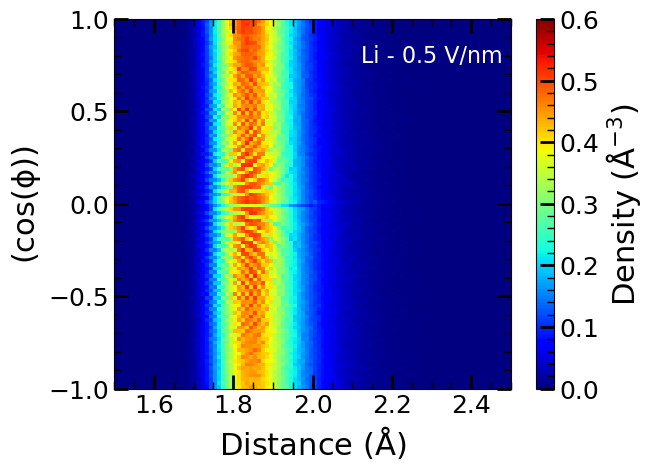

16
0.6357312307254949


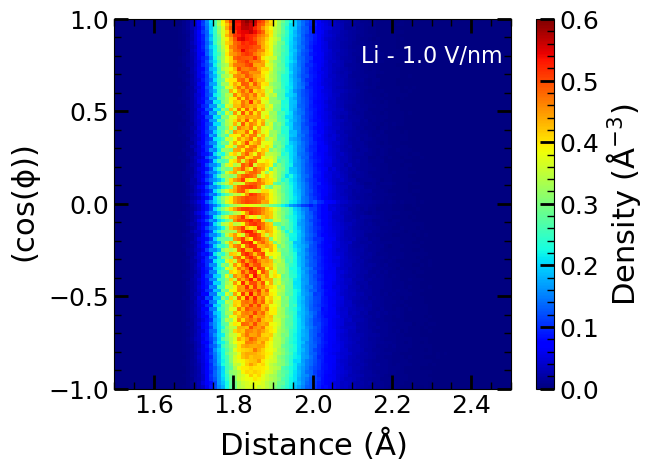

16
0.3162797715033249


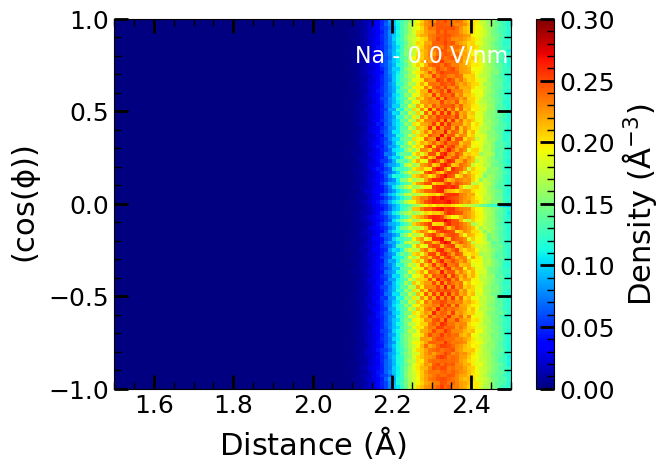

16
0.29988744877748086


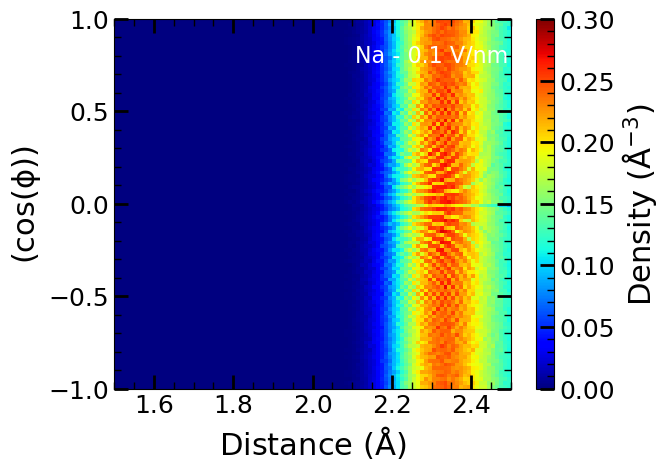

16
0.30405207824237807


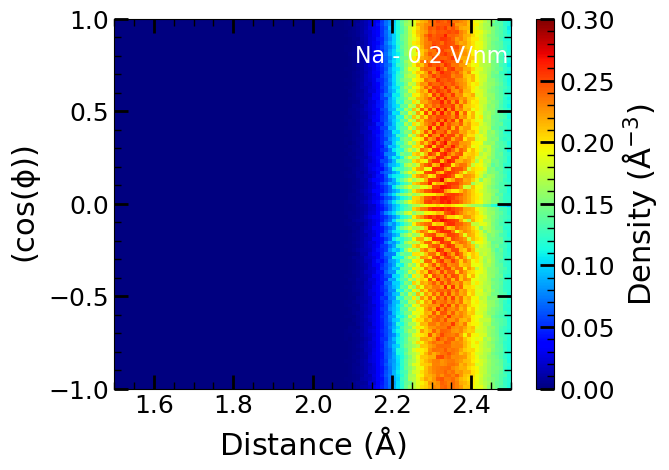

16
0.30796580740013585


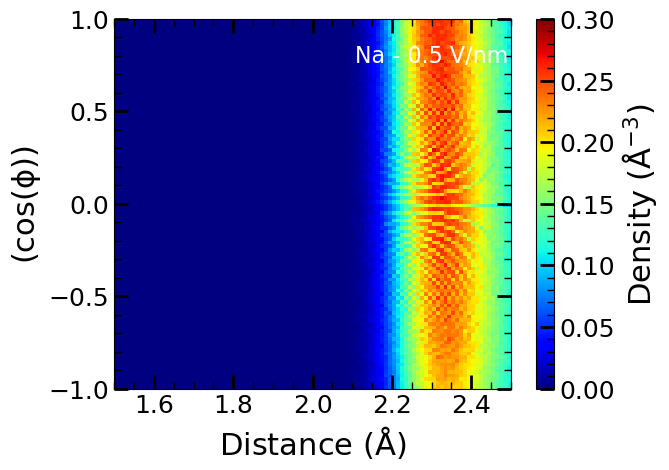

16
0.3190300131311652


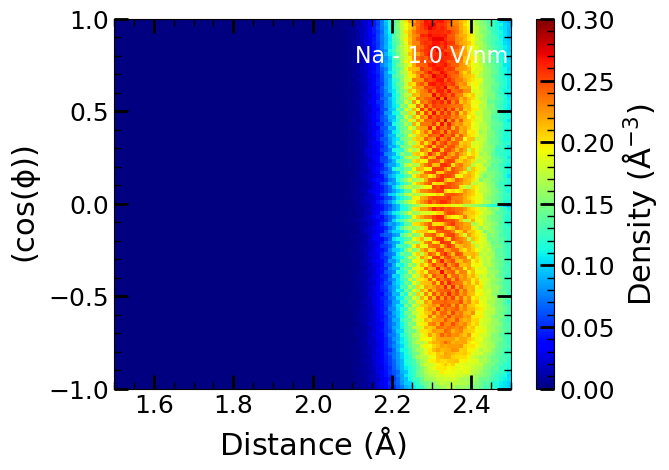

16
0.20382929862408317


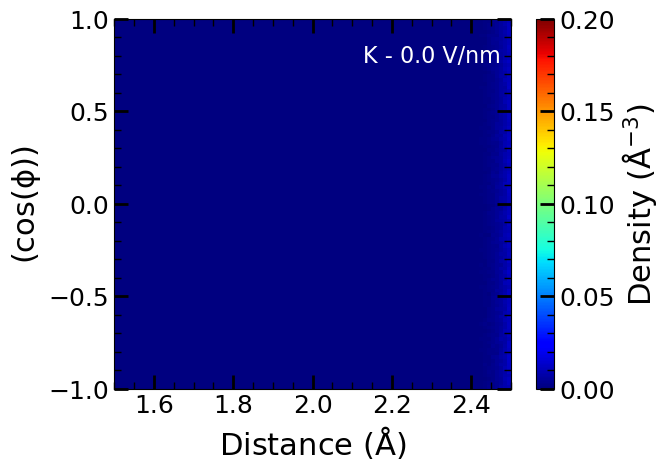

16
0.20910985040190913


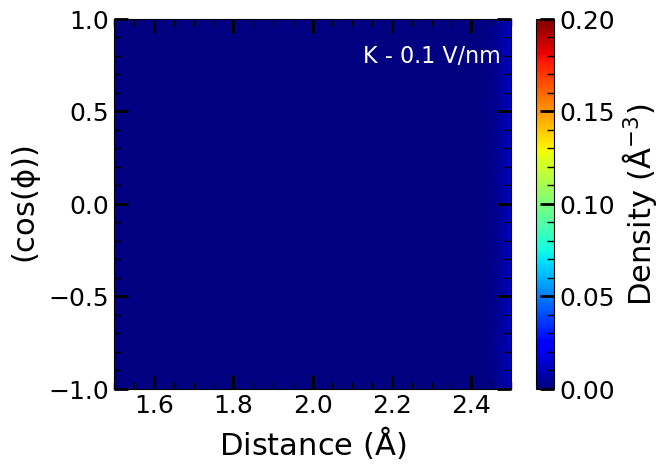

16
0.2127694786578458


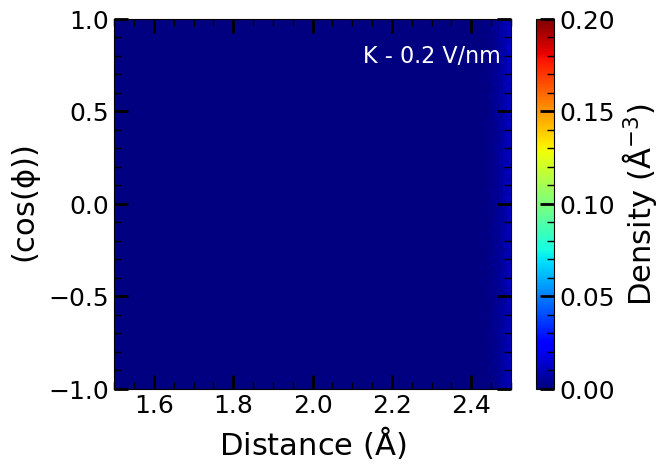

16
0.21227818146860475


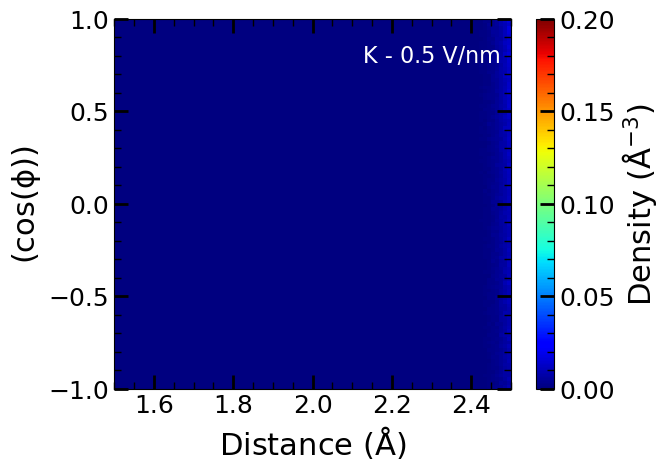

16
0.20277318826851798


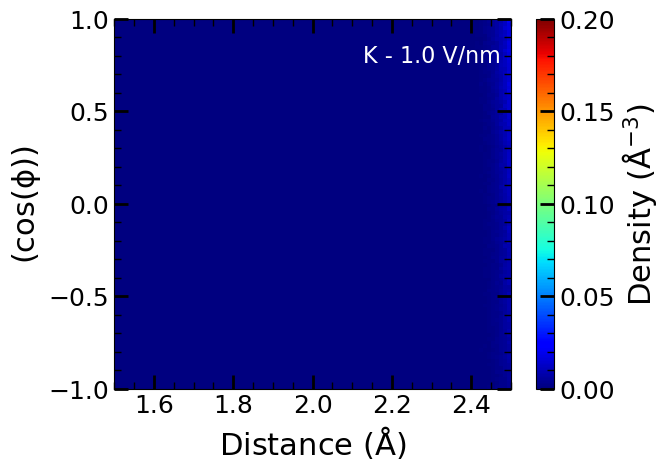

16
0.17872636207259046


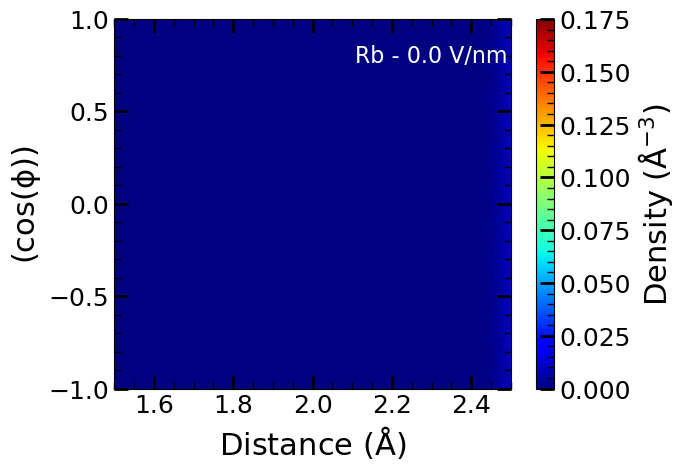

16
0.17682551130394303


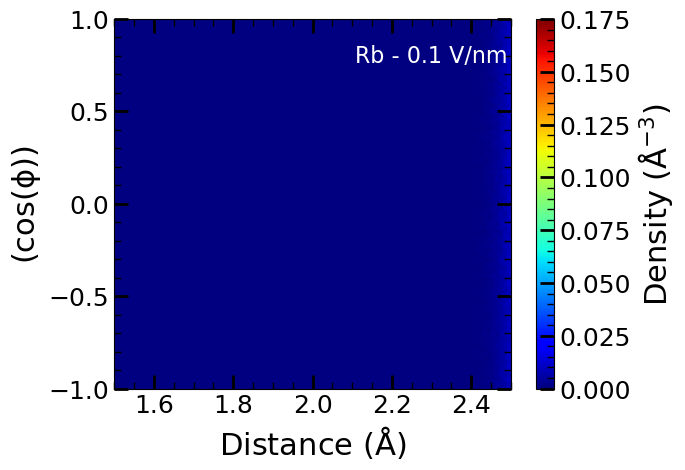

16
0.17464442983308562


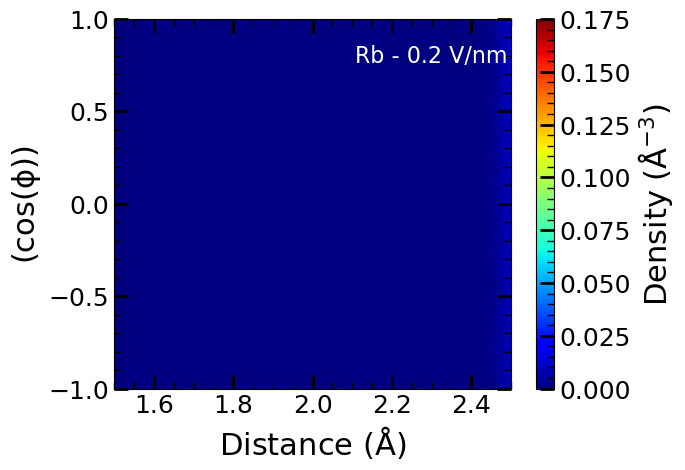

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.5V_16/2d_radialdensity-Rb-OW.xvg
15
0.17320209831269243


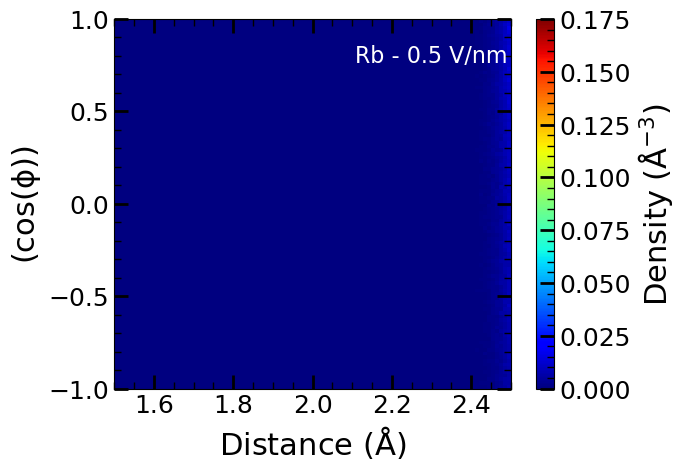

16
0.17823776064925265


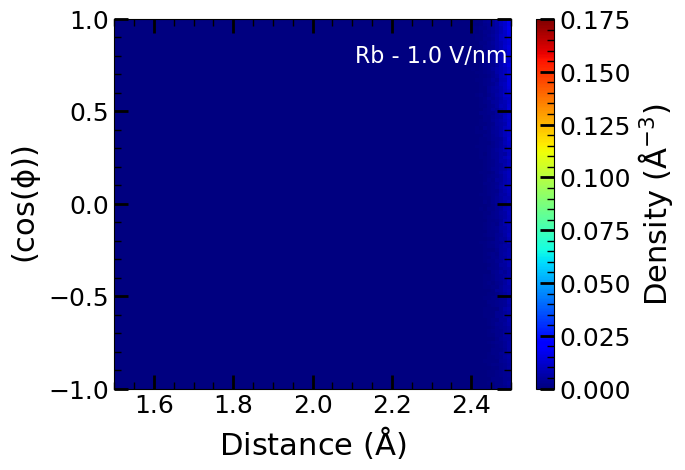

16
0.16499413790321746


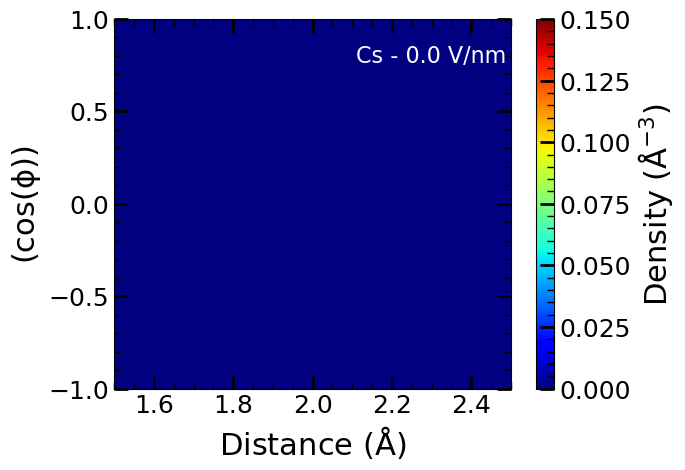

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_8/2d_radialdensity-Cs-OW.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_12/2d_radialdensity-Cs-OW.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_13/2d_radialdensity-Cs-OW.xvg
13
0.14550945220515019


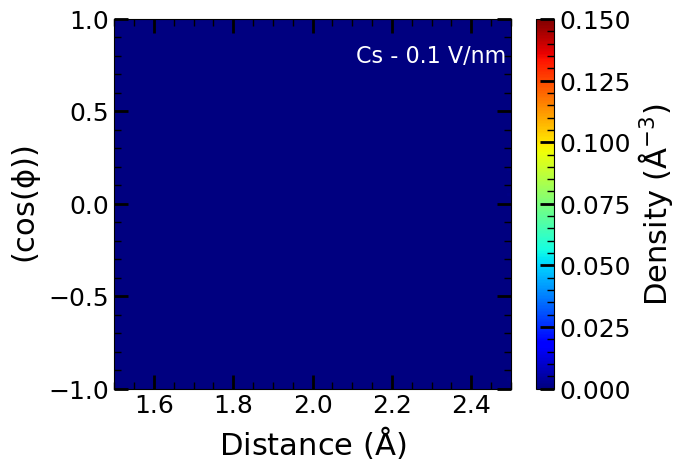

16
0.14752790344892625


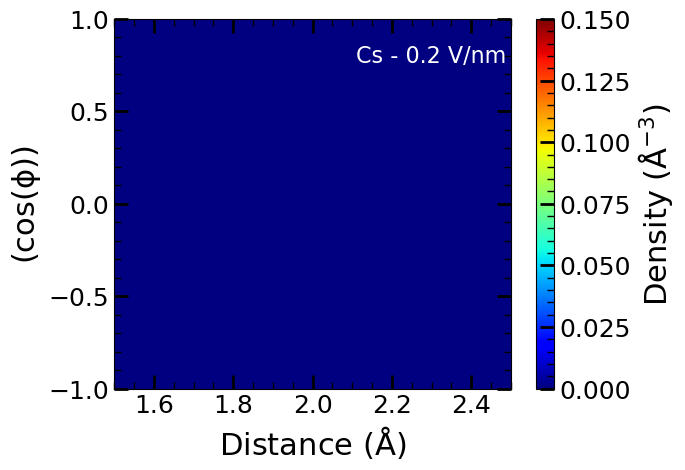

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_12/2d_radialdensity-Cs-OW.xvg
15
0.16287486439885057


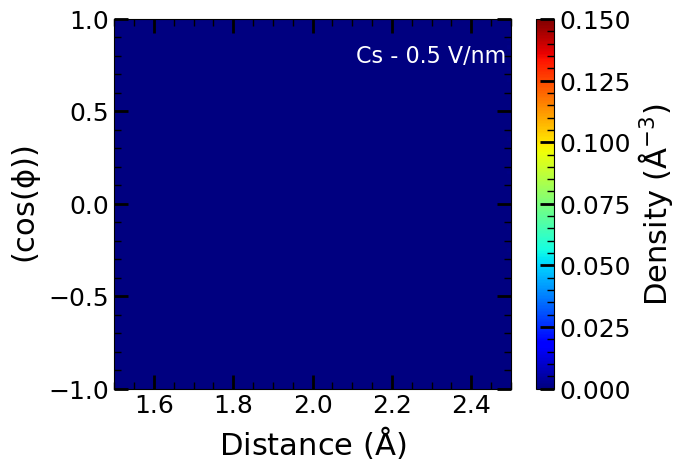

16
0.1645284723754862


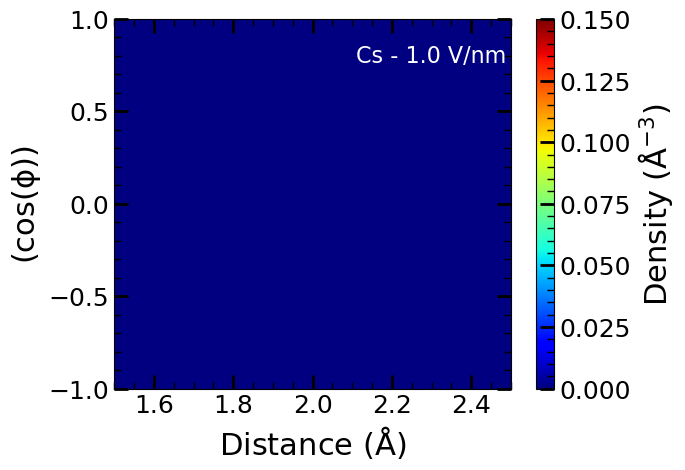

In [11]:
plt.style.use('rcParams.mplstyle')

for cation in catl: 
    for efield in efields:
        num_success = 0
        cnt_total = 0

        for n in range(1,17):
            xvg_file = f"/scratch.global/tramp037/ion_hydration/simulations/{watermodel}-{ionmodel}/{nsol}SOL_{nan}{anl[0]}_{ncat}{cation}/run_{simtime}ns_{pressure}bar_{temp}K_{efield}V_{n}/2d_radialdensity-{cation}-OW.xvg"
            try:
                with open(xvg_file, 'r') as f:
                    centers_t = []
                    centers_r = []
                    count = 0
                    for line in f:
                        # skip lines starting with # and @
                        if line.startswith(('#', '@')):
                            continue
                        else:
                            # obtain the x values (first column) and y values for specified columns
                            values = line.split()
                            if count == 0:
                                bins = [int(v) for v in values]
                                cnt = np.zeros((bins[0],bins[1]))
                            elif count == 1:
                                centers_r = [float(v) for v in values]
                            elif count < bins[1]+2:
                                centers_t.append(float(values[0]))
                                for i in range(bins[0]):
                                    cnt[i,count-2] = float(values[i+1])


                            # x.append(float(values[0]))
                            # for i, c in enumerate(columns):
                            #     # do not add for columns without a name
                            #     if c == '':
                            #         continue
                            #     # print(values,i,path_to_file)
                            #     if values[i+1] == 'nan':
                            #         y[c].append(np.nan)
                            #     y[c].append(float(values[i+1]))
                            count += 1
                num_success += 1
                if num_success == 1:
                    cnt_total = cnt
                else:
                    cnt_total += cnt
            except:
                print(f"Could not open {xvg_file}")
                continue

        if num_success > 0:
            print(num_success)
            cnt_total /= num_success
            # 2D histogram plot of cnt
            plt.figure()
            # plot with borders around each bin
            plt.text(0.8, 0.9, f'{cation} - {efield} V/nm', horizontalalignment='center', verticalalignment='center', transform = plt.gca().transAxes, fontsize=16, color='white')
            if cation == "Li":
                vm = 0.6
            elif cation == "Na":
                vm = 0.3
            elif cation == "K":
                vm = 0.2
            elif cation == "Rb":
                vm = 0.175
            elif cation == "Cs":
                vm = 0.15
            print(np.max(cnt))
            plt.pcolormesh(centers_r,centers_t,cnt_total.T, cmap='jet', vmax=vm)
            plt.xlim(1.5,2.5)
            # plt.ylim()
            # flip the colorbar
            plt.colorbar(label='Density ($\mathrm{\AA}^{-3}$)')
            plt.xlabel('Distance ($\mathrm{\AA}$)')
            plt.ylabel('$(\mathrm{cos(\phi)})$')
            plt.show()


<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:76: SyntaxWarning: invalid escape sequence '\m'
<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:76: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2025123/4277454812.py:74: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label='Density ($\mathrm{\AA}^{-3}$)')
/tmp/ipykernel_2025123/4277454812.py:75: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Distance ($\mathrm{\AA}$)')
/tmp/ipykernel_2025123/4277454812.py:76: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$(\mathrm{cos(\phi)})$')


16
0.3183013269730465


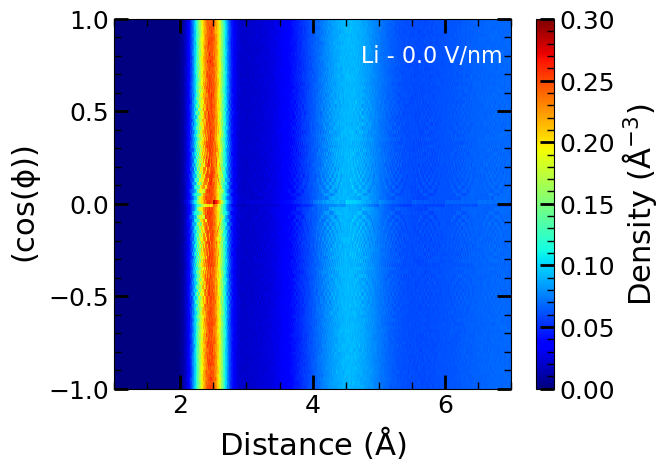

16
0.3082961488296982


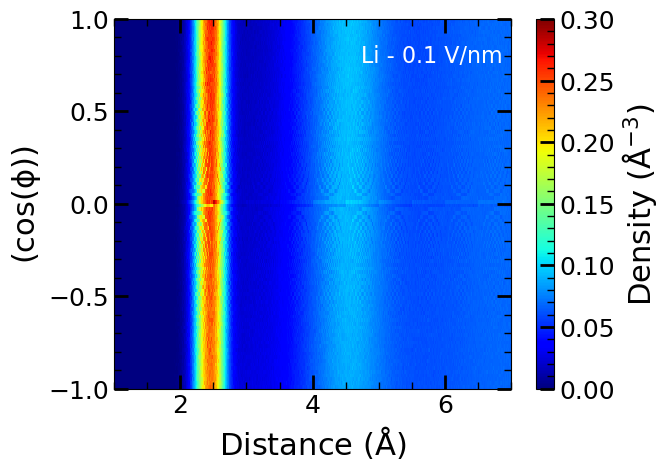

16
0.31682037499865606


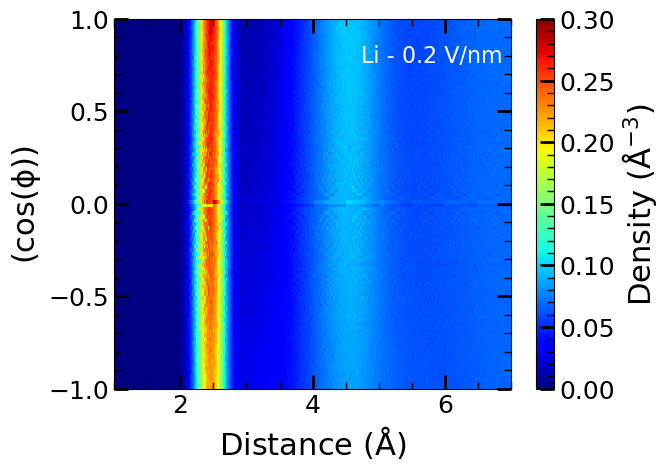

16
0.3529812900053577


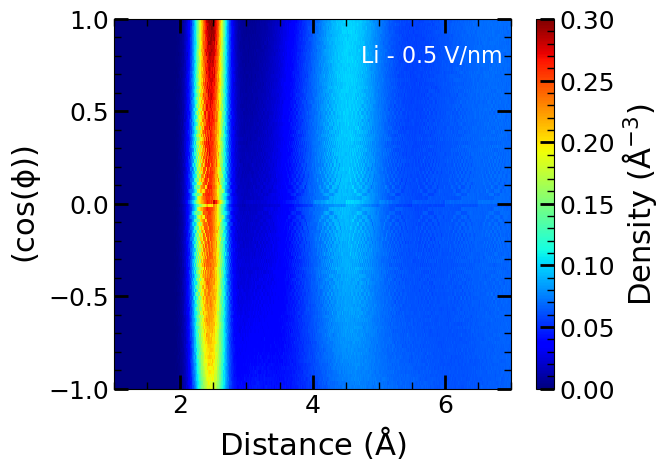

16
0.366346958192158


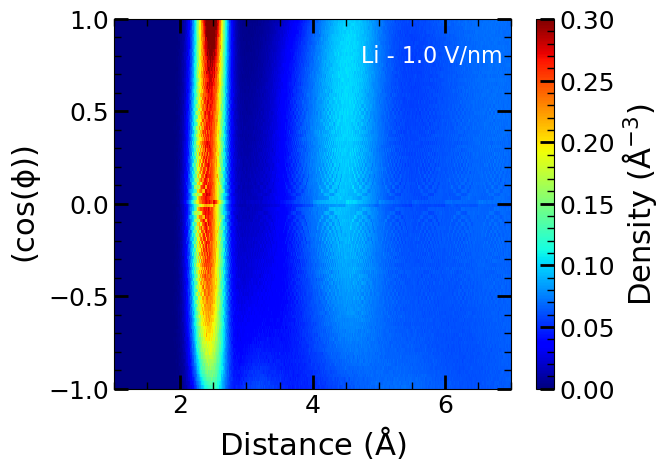

16
0.22408300197137349


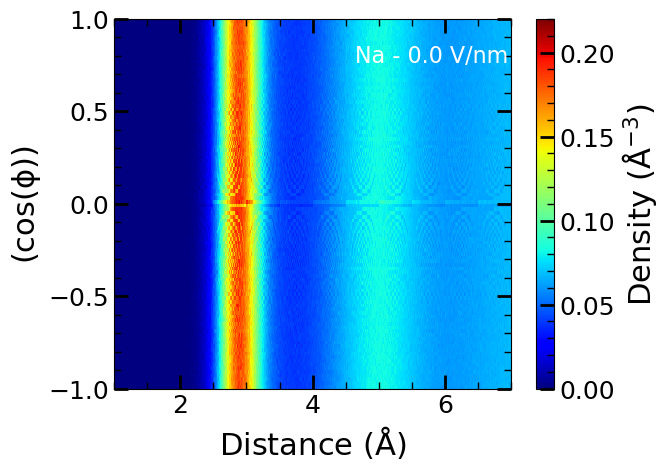

16
0.2387646475668144


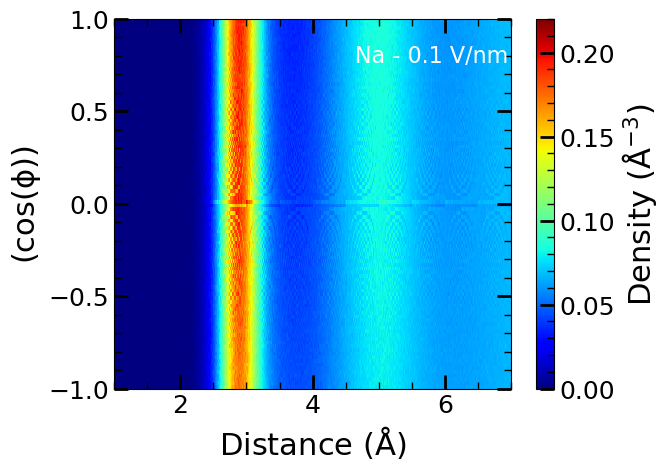

16
0.2414038168768678


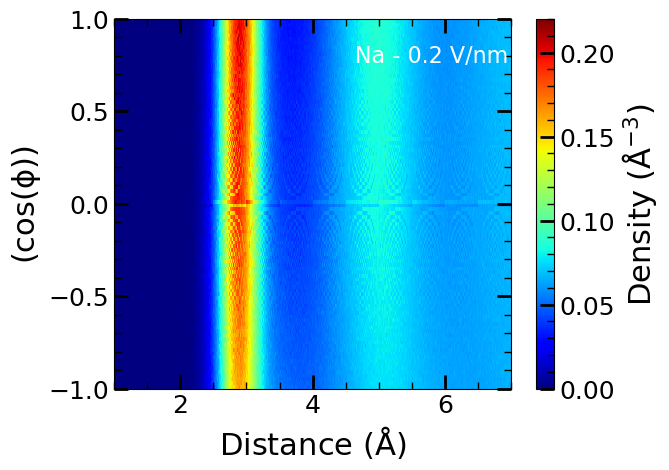

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_0.5V_11/2d_radialdensity-Na-HW.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_0.5V_12/2d_radialdensity-Na-HW.xvg
14
0.2678446449940921


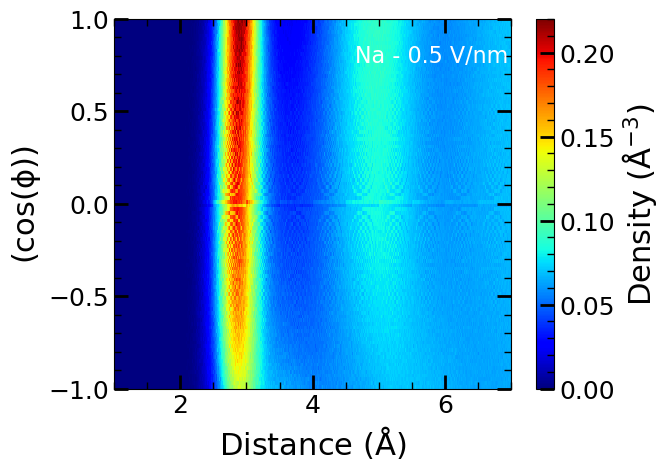

16
0.2511343268418918


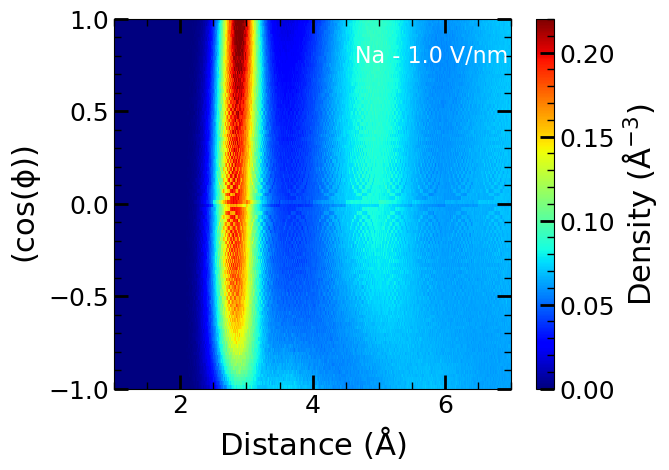

16
0.1869700626860786


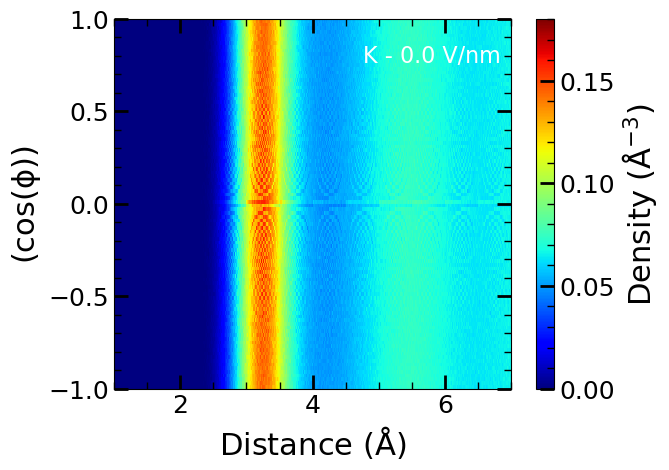

16
0.18097663970745992


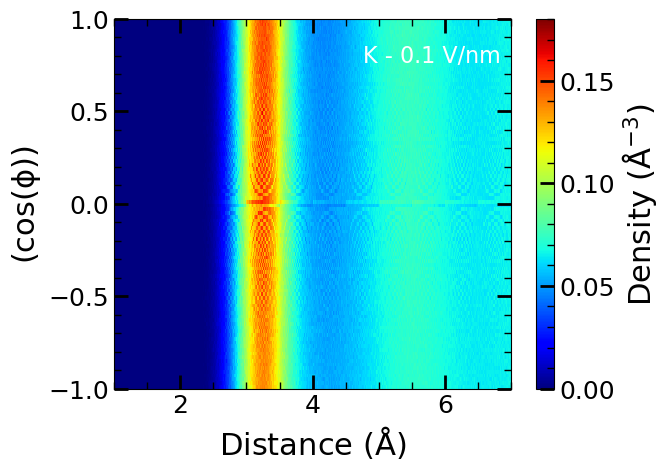

16
0.18944798214592917


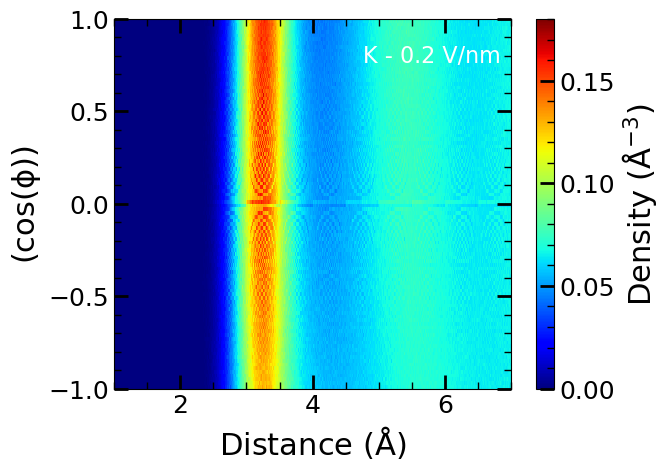

16
0.19276982638682613


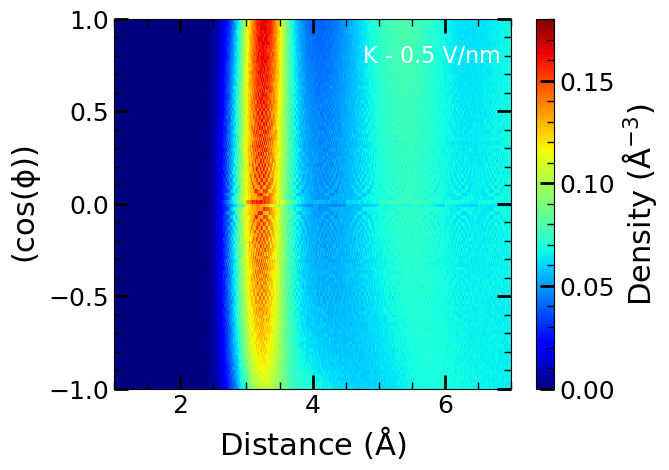

16
0.19303020632423964


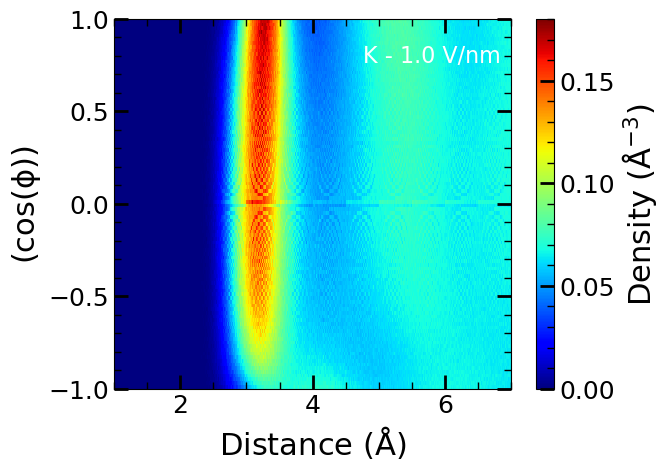

16
0.17800840038461008


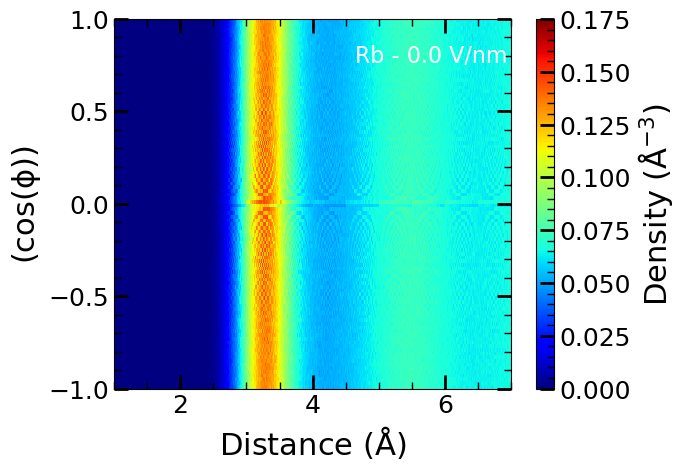

16
0.1703309550187858


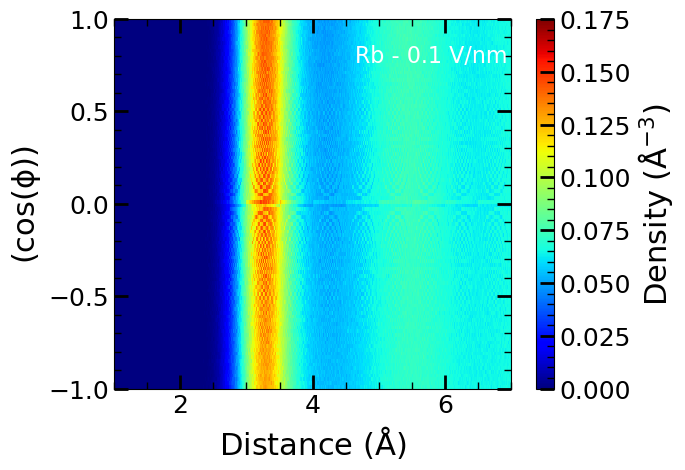

16
0.18393348551584482


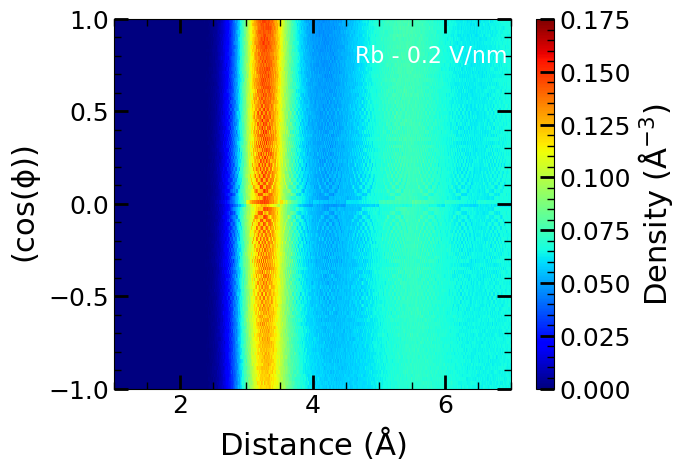

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.5V_16/2d_radialdensity-Rb-HW.xvg
15
0.1862281179928799


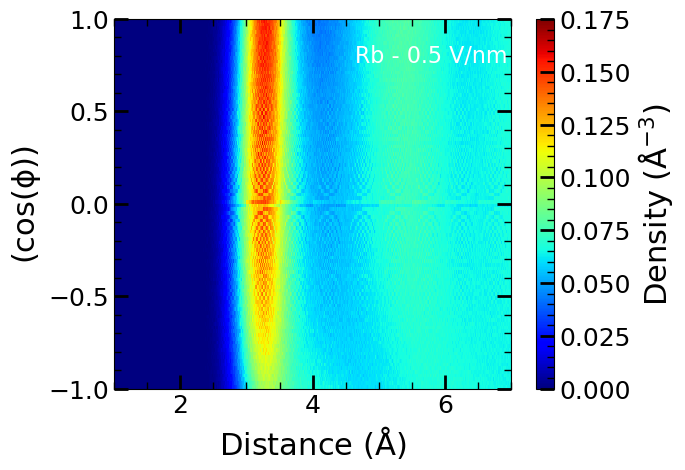

16
0.18631487963241594


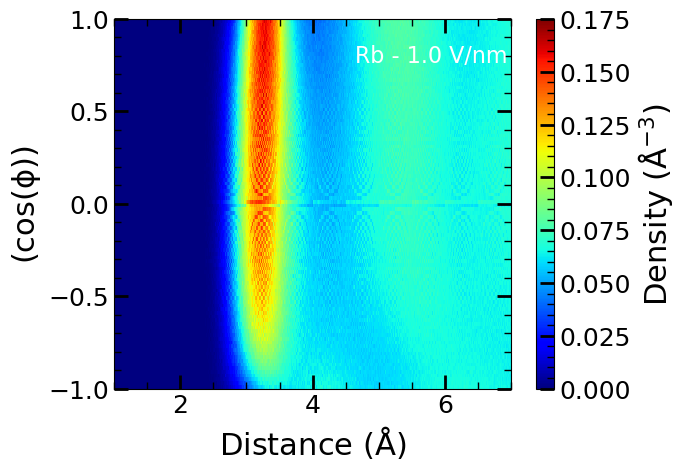

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.0V_11/2d_radialdensity-Cs-HW.xvg
15
0.17116410409294422


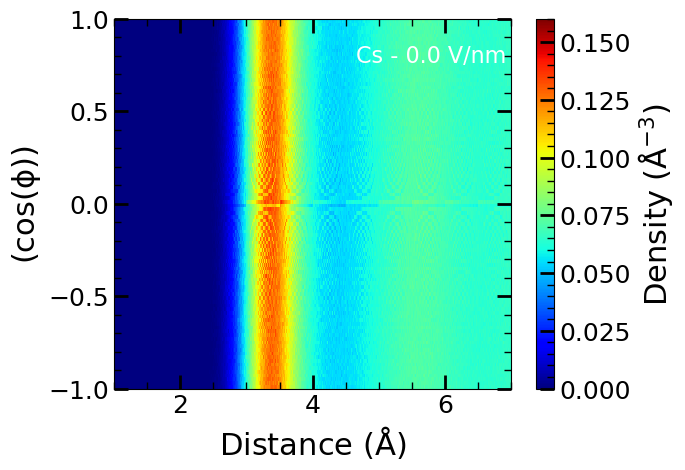

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_8/2d_radialdensity-Cs-HW.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_12/2d_radialdensity-Cs-HW.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.1V_13/2d_radialdensity-Cs-HW.xvg
13
0.16278055613737144


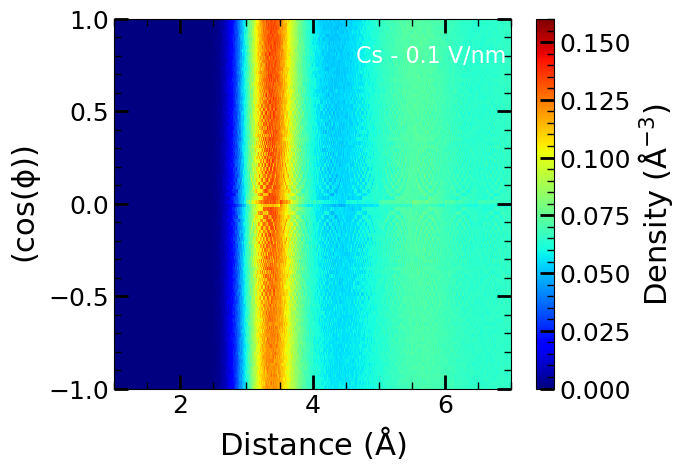

16
0.1646626216187448


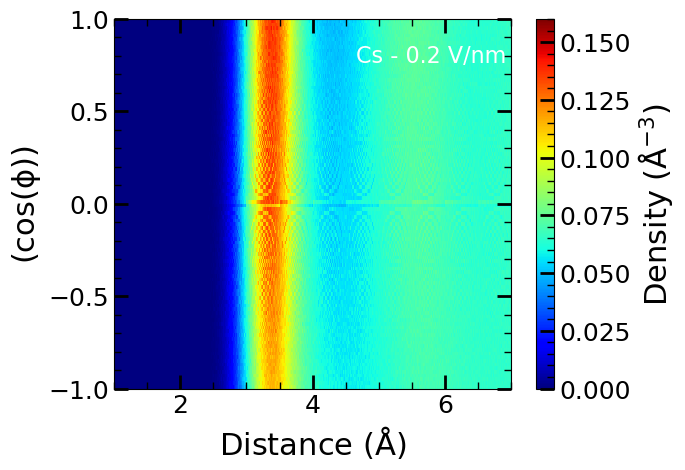

Could not open /scratch.global/tramp037/ion_hydration/simulations/TIP4P2005-Madrid2019/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_12/2d_radialdensity-Cs-HW.xvg
15
0.17953088795912853


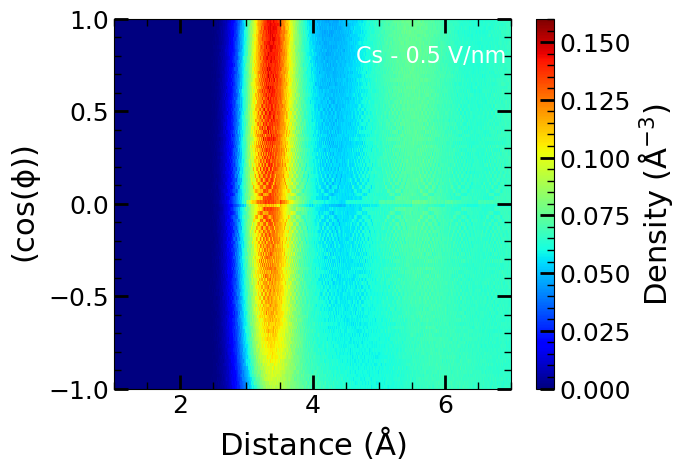

16
0.17223781121724027


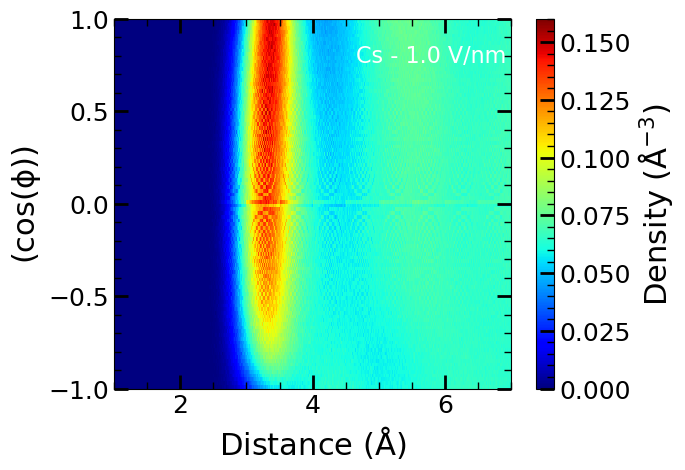

In [10]:
plt.style.use('rcParams.mplstyle')

for cation in catl: 
    for efield in efields:
        num_success = 0
        cnt_total = 0

        for n in range(1,17):
            xvg_file = f"/scratch.global/tramp037/ion_hydration/simulations/{watermodel}-{ionmodel}/{nsol}SOL_{nan}{anl[0]}_{ncat}{cation}/run_{simtime}ns_{pressure}bar_{temp}K_{efield}V_{n}/2d_radialdensity-{cation}-HW.xvg"
            try:
                with open(xvg_file, 'r') as f:
                    centers_t = []
                    centers_r = []
                    count = 0
                    for line in f:
                        # skip lines starting with # and @
                        if line.startswith(('#', '@')):
                            continue
                        else:
                            # obtain the x values (first column) and y values for specified columns
                            values = line.split()
                            if count == 0:
                                bins = [int(v) for v in values]
                                cnt = np.zeros((bins[0],bins[1]))
                            elif count == 1:
                                centers_r = [float(v) for v in values]
                            elif count < bins[1]+2:
                                centers_t.append(float(values[0]))
                                for i in range(bins[0]):
                                    cnt[i,count-2] = float(values[i+1])


                            # x.append(float(values[0]))
                            # for i, c in enumerate(columns):
                            #     # do not add for columns without a name
                            #     if c == '':
                            #         continue
                            #     # print(values,i,path_to_file)
                            #     if values[i+1] == 'nan':
                            #         y[c].append(np.nan)
                            #     y[c].append(float(values[i+1]))
                            count += 1
                num_success += 1
                if num_success == 1:
                    cnt_total = cnt
                else:
                    cnt_total += cnt
            except:
                print(f"Could not open {xvg_file}")
                continue

        if num_success > 0:
            print(num_success)
            cnt_total /= num_success
            # 2D histogram plot of cnt
            plt.figure()
            # plot with borders around each bin
            plt.text(0.8, 0.9, f'{cation} - {efield} V/nm', horizontalalignment='center', verticalalignment='center', transform = plt.gca().transAxes, fontsize=16, color='white')
            if cation == "Li":
                vm = 0.3
            elif cation == "Na":
                vm = 0.22
            elif cation == "K":
                vm = 0.18
            elif cation == "Rb":
                vm = 0.175
            elif cation == "Cs":
                vm = 0.16
            print(np.max(cnt))
            plt.pcolormesh(centers_r,centers_t,cnt_total.T, cmap='jet', vmax=vm)
            plt.xlim(1,7)
            # plt.ylim()
            # flip the colorbar
            plt.colorbar(label='Density ($\mathrm{\AA}^{-3}$)')
            plt.xlabel('Distance ($\mathrm{\AA}$)')
            plt.ylabel('$(\mathrm{cos(\phi)})$')
            plt.show()
